# Variable corrolation

The following conditions apply:

 - env = biomass_zonal
 - data merged_slats_field_agb_dp1_start.csv

In [1]:

%matplotlib inline
import sklearn
import pandas as pd
pd.set_option('display.float_format', '{:.2f}'.format)
import numpy as np
from random import sample
from sklearn.ensemble import RandomForestRegressor as rfr
from sklearn.ensemble import ExtraTreesRegressor as etr
from sklearn.ensemble import GradientBoostingRegressor as gbr
from sklearn.ensemble import AdaBoostRegressor as abr
from sklearn.tree import DecisionTreeRegressor as dtr
import matplotlib.pyplot as plt
import csv
from sklearn.model_selection import train_test_split
from sklearn import metrics
# import plotting and stats modules

import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy
import scipy.stats as sc
import numpy as np
from glob import glob
from random import randint 

# stats module
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from statsmodels.stats.outliers_influence import variance_inflation_factor

from bokeh.io import output_notebook, output_file
from bokeh.plotting import figure, show, save
#%matplotlib inline

# Bokeh Libraries
# from bokeh.plotting import figure, show
# from bokeh.io import output_file
from bokeh.models import ColumnDataSource, NumeralTickFormatter, HoverTool


from sklearn.model_selection import cross_validate
#sklearn.model_selection.cross_validate
# from sklearn import cross_validation
from sklearn.metrics import explained_variance_score
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
#from sklearn.cross_validation import KFold
import pickle as Pickle

In [2]:

%matplotlib inline

# import plotting and stats modules
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy
import scipy.stats as sc
import numpy as np
from glob import glob
import pandas as pd

# stats module
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Set option to display floating-point numbers without scientific notation
pd.set_option('display.float_format', lambda x: '%.2f' % x)

from bokeh.io import output_notebook, output_file
from bokeh.plotting import figure, show, save
#%matplotlib inline

# Bokeh Libraries
from bokeh.plotting import figure, show
from bokeh.io import output_file
from bokeh.models import ColumnDataSource, NumeralTickFormatter, HoverTool

from sklearn.model_selection import train_test_split

from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV


### Import data

In [3]:
drive = "D"
date = "20240504"
mdl = "rfr"
#mdl = "gbr"
#mdl = "abr"

In [4]:
#csv_file = r"F:\cdu\data\zonal_stats\output\merged_slats_field_nt_mosaic_clean_start_all_values.csv"
#csv_file = r"E:\cdu\data\zonal_stats\output\merged_slats_field_agb_dp1_start.csv"
#csv_file = r"{0}:\cdu\data\zonal_stats\output\{1}\dja_dbi_dim_dis_dka_stc_h99a2_fpca2_dry_indicies_clean.csv".format(drive, date)
csv_file = r"{0}:\cdu\data\latest_biomass_data\20240402\dp1_dbi_si_dry_mask_density_near_met_si_fire.csv".format(drive)

In [19]:
csv_file = r"C:\Users\robot\projects\cdu\biomass\dp1_dbi_si_dry_mask_density_near_met_si_fire.csv"
#csv_file = r"C:\Users\robot\projects\cdu\biomass\dp1_dbi_si_annual_mask_density_near_met_si_fire.csv"
# csv_file = r"C:\Users\robot\projects\cdu\biomass\dp1_dbi_si_annual_density_near_met_si_fire.csv"
# csv_file = r"C:\Users\robot\projects\cdu\biomass\dp0_dbg_si_single_dry_density_near_met_si_fire.csv"
# csv_file = r"C:\Users\robot\projects\cdu\biomass\dp0_dbg_si_single_annual_density_near_met_si_fire.csv"
# csv_file = r"C:\Users\robot\projects\cdu\biomass\dp0_dbg_si_mask_single_dry_density_near_met_si_fire.csv"
# csv_file = r"C:\Users\robot\projects\cdu\biomass\dp0_dbg_si_mask_single_annual_density_near_met_si_fire.csv"

## Set output file locations

In [20]:
output = r"{0}:\cdu\data\zonal_stats\output\{1}".format(drive, date)
output_ = os.path.join(output, "plots")

In [21]:
if not os.path.isdir(output):
    os.mkdir(output)
if not os.path.isdir(output_):
    os.mkdir(output_)

In [22]:
# read as dataframe and copy
df1 = pd.read_csv(csv_file, header=0) # the first row is read in as the header for you columns
print(df1.shape) # prints out the number of rows and columns in your csv file 
print(list(df1))
df1.shape
df2 = df1.copy()

(189, 297)
['uid', 'site_clean', 'date', 'lon_gda94', 'lat_gda94', 'bio_l_kg1ha', 'bio_t_kg1ha', 'bio_b_kg1ha', 'bio_w_kg1ha', 'bio_br_kg1ha', 'bio_s_kg1ha', 'bio_r_kg1ha', 'bio_agb_kg1ha', 'c_l_kg1ha', 'c_t_kg1ha', 'c_b_kg1ha', 'c_w_kg1ha', 'c_br_kg1ha', 'c_s_kg1ha', 'c_r_kg1ha', 'c_agb_kg1ha', 'geometry', 'basal_dt', 'im_date', 'band', 'fire_count', 'fire_min', 'fire_max', 'fire_mean', 'fire_sum', 'fire_std', 'fire_med', 'fire_major', 'fire_minor', 'jan', 'feb', 'mar', 'april', 'may', 'june', 'july', 'aug', 'sep', 'oct', 'nov', 'dec', 's_date', 'e_date', 'image_s_dt', 'image_e_dt', 'area_ha', 'jan_per', 'feb_per', 'mar_per', 'april_per', 'may_per', 'june_per', 'july_per', 'aug_per', 'sep_per', 'oct_per', 'nov_per', 'dec_per', 'burnt_enco', 'burnt_cat', 'fire_sn_ord', 'fire_sn_cat', 'fire_f', 'fire_tot', 'since_fire', 'fire_gap', 'fire_pois1_2', 'fire_pois1_5', 'fire_pois1_10', 'year', 'tot_an_emsi_avg', 'tot_an_emsi_avg_R', 'tot_an_emsi_avg_si', 'emsi_dt', 'tot_an_drsi_avg', 'tot_an_

In [23]:
df = df2.rename(columns={'bio_agb_kg1ha': 'target'})

In [24]:
df

,uid,site_clean,date,lon_gda94,lat_gda94,bio_l_kg1ha,bio_t_kg1ha,bio_b_kg1ha,bio_w_kg1ha,bio_br_kg1ha,...,dbifmdry_NDGI,dbifmdry_RI,dbifmdry_NBR,dbifmdry_NDII,dbifmdry_GDVI,dbifmdry_MSAVI,dbifmdry_DVI,dbifmdry_SAVI,dbifmdry_NDVI,dbifmdry_MSR
0,70,nt001.2011,20110523,131.21,-13.95,0.00,0.00,0.00,0.00,0.00,...,-963139.00,963139.00,2033821.00,-266174.00,1873000.00,2729666.00,1711000.00,3000000.00,4812940.00,6898960.00
1,24,barkely01.2011,20111025,135.04,-18.00,0.00,0.00,0.00,0.00,0.00,...,-1995622.00,1995622.00,1967000.00,-635406.00,1659000.00,1598441.00,1112000.00,1774468.00,2527273.00,2947583.00
2,26,barkely03.2011,20111026,135.29,-18.02,0.00,0.00,0.00,0.00,0.00,...,-1703353.00,1703353.00,2254432.00,-530218.00,1713000.00,1708085.00,1210000.00,1877716.00,2593228.00,3039292.00
3,27,barkely04.2011,20111026,135.23,-17.98,0.00,0.00,0.00,0.00,0.00,...,-2256318.00,2256318.00,2646032.00,-303355.00,1859000.00,2027352.00,1359000.00,2246281.00,3334969.00,4144739.00
4,25,barkely02.2011,20111026,135.26,-18.06,0.00,0.00,0.00,0.00,0.00,...,-2041078.00,2041078.00,3188841.00,399323.00,2143000.00,2429125.00,1666000.00,2636076.00,3718750.00,4778632.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,158,site23.2023,20230916,132.54,-12.66,320.02,347.99,1359.66,4423.39,3354.31,...,-1149782.00,1149782.00,-32626.00,-1256857.00,1121000.00,1544343.00,936000.00,1816300.00,3428571.00,4295028.00
185,155,site20.2023,20230916,131.56,-12.81,602.67,654.04,2204.47,11815.54,5206.21,...,-2002328.00,2002328.00,3735369.00,567737.00,2012000.00,2608361.00,1668000.00,2865979.00,4471850.00,6179761.00
186,156,site21.2023,20230916,131.57,-12.82,1934.59,2097.90,5741.75,22983.80,12704.86,...,-1072797.00,1072797.00,5216990.00,1735106.00,2006000.00,3235163.00,1894000.00,3529193.00,6209836.00,10680466.00
187,157,site22.2023,20230916,132.25,-12.77,568.16,616.63,2503.13,16614.99,5420.45,...,-1377778.00,1377778.00,4443054.00,1184880.00,1823000.00,2830628.00,1668000.00,3147962.00,5658073.00,8990129.00


## Main only

In [25]:
# #main only
# var_ = "main_only"

# df_columns = list(df.columns)
# keep = ['site_clean', "target", "mean", "major"]
# header = [ele for ele in df_columns for x in keep if x in ele]
# df2 = df[header]

In [26]:
#main major and h99 
var_ = "main_only"

df_columns = list(df.columns)
keep = ['site_clean', "target", "mean", "major", "h99"]
header = [ele for ele in df_columns for x in keep if x in ele]
df2 = df[header]

In [27]:
df.columns

Index(['uid', 'site_clean', 'date', 'lon_gda94', 'lat_gda94', 'bio_l_kg1ha',
       'bio_t_kg1ha', 'bio_b_kg1ha', 'bio_w_kg1ha', 'bio_br_kg1ha',
       ...
       'dbifmdry_NDGI', 'dbifmdry_RI', 'dbifmdry_NBR', 'dbifmdry_NDII',
       'dbifmdry_GDVI', 'dbifmdry_MSAVI', 'dbifmdry_DVI', 'dbifmdry_SAVI',
       'dbifmdry_NDVI', 'dbifmdry_MSR'],
      dtype='object', length=297)

In [31]:
df2 = df[['site_clean', "target",

'b6_dbifm_dry_mean',
 'b3_dbifm_dry_mean',
 'b2_dbifm_dry_mean',
 'dbifmdry_GNDVI',
 'dbifmdry_MSR',
 'b2_dp1fm_dry_mean',
 'b3_dp1fm_dry_mean',
 'dbifmdry_NBR',
 'b5_dbifm_dry_mean',
 'dbifmdry_NDVI',
 'b1_hsd_mean',
 'b1_h99_mean',
 'b1_dbifm_dry_mean',
 'rh_tmin_mean',
 'dbifmdry_CVI',
 'b1_ccw_dry_mean',
 'b1_dp1fm_dry_mean',
 'b1_wfp_dry_mean',
 'dbifmdry_GDVI',
 'dbifmdry_GSAVI']]

d_type = "20_ada"

In [32]:
df2

,site_clean,target,b6_dbifm_dry_mean,b3_dbifm_dry_mean,b2_dbifm_dry_mean,dbifmdry_GNDVI,dbifmdry_MSR,b2_dp1fm_dry_mean,b3_dp1fm_dry_mean,dbifmdry_NBR,...,b1_hsd_mean,b1_h99_mean,b1_dbifm_dry_mean,rh_tmin_mean,dbifmdry_CVI,b1_ccw_dry_mean,b1_dp1fm_dry_mean,b1_wfp_dry_mean,dbifmdry_GDVI,dbifmdry_GSAVI
0,nt001.2011,0.00,1743.22,922.56,760.33,5520189.00,6898960.00,62.56,25.67,2033821.00,...,102.31,110.21,394.67,3368.30,42029536.00,87.33,10.33,68.22,1873000.00,3347432.00
1,barkely01.2011,0.00,1850.89,1644.89,1097.78,4305736.00,2947583.00,2.11,92.33,1967000.00,...,101.61,106.91,613.33,3353.40,37650242.00,1.00,4.11,4.57,1659000.00,2810912.00
2,barkely03.2011,0.00,1857.33,1728.67,1225.89,4114821.00,3039292.00,4.22,90.67,2254432.00,...,100.92,104.51,675.56,3359.00,33831663.00,2.25,3.44,1.50,1713000.00,2804213.00
3,barkely04.2011,0.00,1580.67,1358.11,858.00,5200000.00,4144739.00,3.67,90.11,2646032.00,...,101.98,107.93,457.78,3358.10,50120435.00,9.44,4.44,5.62,1859000.00,3251895.00
4,barkely02.2011,0.00,1587.00,1407.67,930.33,5353485.00,4778632.00,0.22,89.78,3188841.00,...,100.94,106.17,470.67,3357.80,49990878.00,13.22,8.89,7.33,2143000.00,3570477.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,site23.2023,9471.00,1845.44,897.67,712.67,4404715.00,4295028.00,27.78,46.33,-32626.00,...,103.50,112.07,441.11,3373.30,32433582.00,30.11,24.44,17.22,1121000.00,2228628.00
185,site20.2023,19813.34,1231.00,1031.78,687.44,5942115.00,6179761.00,42.11,53.67,3735369.00,...,103.35,112.71,402.33,3376.50,58958724.00,54.22,2.67,34.22,2012000.00,3598855.00
186,site21.2023,43331.12,777.22,578.22,466.44,6827774.00,10680466.00,56.00,39.78,5216990.00,...,105.12,119.99,254.44,3376.50,65796754.00,81.89,2.56,60.56,2006000.00,3790627.00
187,site22.2023,25116.35,888.17,640.08,485.33,6527032.00,8990129.00,45.58,50.83,4443054.00,...,104.82,118.99,240.50,3372.00,62796046.00,73.42,2.08,51.00,1823000.00,3508918.00


### Logical selection

## dp1_dbi_si_dry_mask_density_near_met_si_fire.csv

In [30]:
df2 =df[['site_clean', 
 'target', 
 'fire_count', 
 'fire_min', 
 'fire_max', 
 'fire_mean', 
 'fire_sum', 
 'fire_std', 
 'fire_med', 
 'fire_major', 
 'fire_minor', 
#  'jan', 
#  'feb', 
#  'mar', 
#  'april', 
#  'may', 
#  'june', 
#  'july', 
#  'aug', 
#  'sep', 
#  'oct', 
#  'nov', 
#  'dec', 
#   'jan_per', 
#  'feb_per', 
#  'mar_per', 
#  'april_per', 
#  'may_per', 
#  'june_per', 
#  'july_per', 
#  'aug_per',
#  'sep_per', 
#  'oct_per', 
#  'nov_per', 
#  'dec_per', 
 'burnt_enco', 
#  'burnt_cat', 
 'fire_sn_ord', 
#  'fire_sn_cat', 
 'fire_f', 
 'fire_tot', 
 'since_fire', 
 'fire_gap', 
 'fire_pois1_2', 
 'fire_pois1_5', 
 'fire_pois1_10', 
#  'tot_an_emsi_avg', 
#  'tot_an_emsi_avg_R', 
 'tot_an_emsi_avg_si', 
#  'emsi_dt', 
#  'tot_an_drsi_avg', 
#  'tot_an_drsi_avg_R', 
 'tot_an_drsi_avg_si', 
#  'drsi_dt', 
 'tot_avg_emse_djf', 
 'tot_avg_emse_mam', 
 'tot_avg_emse_jja', 
 'tot_avg_emse_son', 
 'tot_avg_emse_dry', 
 'tot_avg_emse_wet', 
 'tot_avg_emse_annual', 
#  'emse_dt', 
 'tot_avg_drse_djf', 
 'tot_avg_drse_mam', 
 'tot_avg_drse_jja', 
 'tot_avg_drse_son', 
 'tot_avg_drse_dry', 
 'tot_avg_drse_wet', 
 'tot_avg_drse_annual', 
#  'drse_dt', 
#  'rain_d_mean', 
#  'et_ma_mean', 
#  'tmax_mean', 
#  'tmin_mean', 
#  'rh_tmax_mean', 
#  'rh_tmin_mean', 
#  'b1_wfp_dry_min', 
#  'b1_wfp_dry_max', 
 'b1_wfp_dry_mean', 
#  'b1_wfp_dry_std', 
#  'b1_wfp_dry_med', 
#  'b1_wfp_dry_p25', 
 'b1_wfp_dry_p50', 
#  'b1_wfp_dry_p75', 
#  'b1_wfp_dry_p95', 
 'b1_wfp_dry_p99', 
 'b1_wdc_dry_major', 
#  'b1_wdc_dry_minor', 
 'b1_n17_dry_major', 
#  'b1_n17_dry_minor', 
#  'b1_hsd_min', 
#  'b1_hsd_max', 
 'b1_hsd_mean', 
#  'b1_hsd_std', 
#  'b1_hsd_med', 
#  'b1_hsd_p25', 
 'b1_hsd_p50', 
#  'b1_hsd_p75', 
#  'b1_hsd_p95', 
 'b1_hsd_p99', 
#  'b1_hmc_min', 
#  'b1_hmc_max', 
 'b1_hmc_mean', 
#  'b1_hmc_std', 
#  'b1_hmc_med', 
#  'b1_hmc_p25', 
 'b1_hmc_p50', 
#  'b1_hmc_p75', 
#  'b1_hmc_p95', 
 'b1_hmc_p99', 
#  'b1_hcv_min', 
#  'b1_hcv_max', 
 'b1_hcv_mean', 
#  'b1_hcv_std', 
#  'b1_hcv_med', 
#  'b1_hcv_p25', 
 'b1_hcv_p50', 
#  'b1_hcv_p75', 
#  'b1_hcv_p95', 
 'b1_hcv_p99', 
#  'hcv_dt', 
#  'b1_h99_min', 
#  'b1_h99_max', 
 'b1_h99_mean', 
#  'b1_h99_std', 
#  'b1_h99_med', 
#  'b1_h99_p25',
 'b1_h99_p50', 
#  'b1_h99_p75', 
#  'b1_h99_p95', 
 'b1_h99_p99', 
 'b1_fdc_dry_major', 
#  'b1_fdc_dry_minor', 
#  'b1_ccw_dry_min', 
#  'b1_ccw_dry_max', 
 'b1_ccw_dry_mean', 
#  'b1_ccw_dry_std', 
#  'b1_ccw_dry_med', 
#  'b1_ccw_dry_p25', 
 'b1_ccw_dry_p50', 
#  'b1_ccw_dry_p75', 
#  'b1_ccw_dry_p95', 
 'b1_ccw_dry_p99', 
#  'b1_dbifm_dry_min', 
#  'b1_dbifm_dry_max', 
 'b1_dbifm_dry_mean', 
#  'b1_dp1fm_dry_min', 
#  'b1_dp1fm_dry_max', 
 'b1_dp1fm_dry_mean', 
#  'b1_dp1fm_dry_std',
#  'b1_dp1fm_dry_med', 
#  'b1_dp1fm_dry_p25', 
 'b1_dp1fm_dry_p50',
#  'b1_dp1fm_dry_p75',
#  'b1_dp1fm_dry_p95', 
 'b1_dp1fm_dry_p99', 
#  'b2_dp1fm_dry_min', 
#  'b2_dp1fm_dry_max', 
 'b2_dp1fm_dry_mean', 
#  'b2_dp1fm_dry_std', 
#  'b2_dp1fm_dry_med', 
#  'b2_dp1fm_dry_p25', 
 'b2_dp1fm_dry_p50', 
#  'b2_dp1fm_dry_p75',
 'b2_dp1fm_dry_p95', 
#  'b2_dp1fm_dry_p99', 
#  'b3_dp1fm_dry_min', 
#  'b3_dp1fm_dry_max', 
 'b3_dp1fm_dry_mean', 
#  'b3_dp1fm_dry_std',
#  'b3_dp1fm_dry_med',
#  'b3_dp1fm_dry_p25',
 'b3_dp1fm_dry_p50', 
#  'b3_dp1fm_dry_p75', 
#  'b3_dp1fm_dry_p95',
 'b3_dp1fm_dry_p99', 
#  'b1_dbifm_dry_std',
#  'b1_dbifm_dry_med',
#  'b1_dbifm_dry_p25', 
 'b1_dbifm_dry_p50', 
#  'b1_dbifm_dry_p75', 
#  'b1_dbifm_dry_p95', 
 'b1_dbifm_dry_p99', 
#  'b2_dbifm_dry_min', 
#  'b2_dbifm_dry_max', 
 'b2_dbifm_dry_mean', 
#  'b2_dbifm_dry_std', 
#  'b2_dbifm_dry_med', 
#  'b2_dbifm_dry_p25', 
 'b2_dbifm_dry_p50', 
#  'b2_dbifm_dry_p75', 
#  'b2_dbifm_dry_p95', 
 'b2_dbifm_dry_p99', 
#  'b3_dbifm_dry_min', 
#  'b3_dbifm_dry_max', 
 'b3_dbifm_dry_mean', 
#  'b3_dbifm_dry_std',
#  'b3_dbifm_dry_med', 
#  'b3_dbifm_dry_p25', 
 'b3_dbifm_dry_p50', 
#  'b3_dbifm_dry_p75', 
#  'b3_dbifm_dry_p95', 
 'b3_dbifm_dry_p99', 
#  'b4_dbifm_dry_min', 
#  'b4_dbifm_dry_max', 
 'b4_dbifm_dry_mean', 
#  'b4_dbifm_dry_std', 
#  'b4_dbifm_dry_med', 
#  'b4_dbifm_dry_p25', 
 'b4_dbifm_dry_p50', 
#  'b4_dbifm_dry_p75', 
#  'b4_dbifm_dry_p95', 
 'b4_dbifm_dry_p99', 
#  'b5_dbifm_dry_min', 
#  'b5_dbifm_dry_max', 
 'b5_dbifm_dry_mean', 
#  'b5_dbifm_dry_std', 
#  'b5_dbifm_dry_med', 
#  'b5_dbifm_dry_p25',
 'b5_dbifm_dry_p50', 
#  'b5_dbifm_dry_p75',
#  'b5_dbifm_dry_p95', 
 'b5_dbifm_dry_p99', 
#  'b6_dbifm_dry_min', 
#  'b6_dbifm_dry_max', 
 'b6_dbifm_dry_mean', 
#  'b6_dbifm_dry_std',
#  'b6_dbifm_dry_med', 
#  'b6_dbifm_dry_p25', 
 'b6_dbifm_dry_p50',
#  'b6_dbifm_dry_p75', 
#  'b6_dbifm_dry_p95', 
 'b6_dbifm_dry_p99',
#  'dbifmdry_psB1a', 
#  'dbifmdry_psB2a', 
#  'dbifmdry_psB3a', 
#  'dbifmdry_psB4a', 
#  'dbifmdry_psB5a', 
#  'dbifmdry_psB6a', 
 'dbifmdry_r32',
 'dbifmdry_r42', 
 'dbifmdry_r43', 
 'dbifmdry_r52', 
 'dbifmdry_r53', 
 'dbifmdry_r54', 
 'dbifmdry_r62', 
 'dbifmdry_r63', 
 'dbifmdry_r64', 
 'dbifmdry_r65', 
 'dbifmdry_GSAVI', 
 'dbifmdry_GNDVI', 
 'dbifmdry_CVI', 
 'dbifmdry_NDGI', 
 'dbifmdry_RI', 
 'dbifmdry_NBR',
 'dbifmdry_NDII',
 'dbifmdry_GDVI', 
 'dbifmdry_MSAVI', 
 'dbifmdry_DVI', 
 'dbifmdry_SAVI', 
 'dbifmdry_NDVI',
 'dbifmdry_MSR',
        ]]

d_type = "mm_si_f"

## Main and Major Only

In [ ]:
#main and major only
var_ = "main_major_only"

df_columns = list(df.columns)
keep = ['site_clean', "target", "mean", "major"]
header = [ele for ele in df_columns for x in keep if x in ele]
df2 = df[header]
d_type = "mean_major"

In [ ]:
#varibles no coorolation
df2 = df2.drop(['rain_d_mean','et_ma_mean','tmax_mean','tmin_mean','rh_tmax_mean','rh_tmin_mean'], axis=1)
df2.columns
d_type = "mean_major_met_rem"

In [ ]:
df2.shape

## Main and veg indicies

In [ ]:
var_ = "main_veg_indicies"

df_columns = list(df.columns)
keep = ['site_clean', "target", "mean", 'major', 'dbifmdry_GSAVI',
 'dbifmdry_GNDVI',
 'dbifmdry_CVI',
 #'dbifmdry_NDGI',
 'dbifmdry_RI',
 'dbifmdry_NBR',
 #'dbifmdry_NDII',
 'dbifmdry_GDVI',
 'dbifmdry_MSAVI',
 'dbifmdry_DVI',
 'dbifmdry_SAVI',
 'dbifmdry_NDVI',
 'dbifmdry_MSR']
header = [ele for ele in df_columns for x in keep if x in ele]
df2 = df[header]

del df2['fire_mean']
del df2['rh_tmin_mean']

#varibles no coorolation
df2 = df2.drop(['rain_d_mean','et_ma_mean','tmax_mean','tmin_mean','rh_tmax_mean'], axis=1)# ,'rh_tmin_mean'
print(list(df2.columns))
d_type = "mm_met_rem"

## Main, veg indicies and fire

In [ ]:
var_ = "main_veg_indicies_fire"

df_columns = list(df.columns)
keep = ['site_clean', "target", "mean", 'dbifmdry_GSAVI',
 'dbifmdry_GNDVI',
 'dbifmdry_CVI',
 'dbifmdry_NDGI',
 'dbifmdry_RI',
 'dbifmdry_NBR',
 'dbifmdry_NDII',
 'dbifmdry_GDVI',
 'dbifmdry_MSAVI',
 'dbifmdry_DVI',
 'dbifmdry_SAVI',
 'dbifmdry_NDVI',
 'dbifmdry_MSR',
       #'burnt', 'intens', 'fire_f', 'fire_tot', 'since_fire', 'fire_gap', 
'fire_pois1_2', 'fire_pois1_5', 'fire_pois1_10',
       ]
header = [ele for ele in df_columns for x in keep if x in ele]
df2 = df[header]

#varibles no coorolation
df2 = df2.drop(['rain_d_mean','et_ma_mean','tmax_mean','tmin_mean','rh_tmax_mean'], axis=1)# ,'rh_tmin_mean'
print(list(df2.columns))
d_type = "mmf_met_rem"

## Remove all target == 0 values

In [33]:
df2 = df2[df2['target']>0.0]
df2.shape

(132, 22)

## Remove site values which seem like outliers

In [34]:
#Dry Fire

#WFP
'''ant03.2012
site12.2023 # lat long error - should be correted
ntagfu0038.2012 # not too bad

'''

# Drop rows where sites seem to be outliers
df3 = df2[df2['site_clean'] != 'ant03.2012']
df4 = df3[df3['site_clean'] != 'site12.2023']
df2 = df4[df4['site_clean'] != 'ntagfu0038.2012']
df2


"""#b1 dbifm
nc02.2013
ntamgd0001.2014
nc02.2013

#b2 dbifm
ntamgd0001.2014
girra02.2012 # minor

#b3 dbifm
ntamgd0001.2014
girra02.2012 # minor

#b4 dbifm
Noisy

#b5 dbifm
reasonable

#b2 dp1
looks pritty reasonable

#b3 dp1
Noisy <1200

#b6 dbifm
wh07.2012
reasonable

#h99

ntastu0003.2016
nttdab0001.2014
ntagfu0035.2012
ntagfu0034.2012

#hcv
site10.2023
site16.2023
site23.2023
girra02.2012
vrd37.2012
ntagfu0034.2012
ntagfu0035.2012

#hmc
nttdab0001.2014
ntastu0003.2016

#n17
ntagfu0003.2012
wh02.2012
wh07.2012 >10
#many are class 1

#wfp looks pritty reasonable

#et ma mean
noisy
"""

'#b1 dbifm\nnc02.2013\nntamgd0001.2014\nnc02.2013\n\n#b2 dbifm\nntamgd0001.2014\ngirra02.2012 # minor\n\n#b3 dbifm\nntamgd0001.2014\ngirra02.2012 # minor\n\n#b4 dbifm\nNoisy\n\n#b5 dbifm\nreasonable\n\n#b2 dp1\nlooks pritty reasonable\n\n#b3 dp1\nNoisy <1200\n\n#b6 dbifm\nwh07.2012\nreasonable\n\n#h99\n\nntastu0003.2016\nnttdab0001.2014\nntagfu0035.2012\nntagfu0034.2012\n\n#hcv\nsite10.2023\nsite16.2023\nsite23.2023\ngirra02.2012\nvrd37.2012\nntagfu0034.2012\nntagfu0035.2012\n\n#hmc\nnttdab0001.2014\nntastu0003.2016\n\n#n17\nntagfu0003.2012\nwh02.2012\nwh07.2012 >10\n#many are class 1\n\n#wfp looks pritty reasonable\n\n#et ma mean\nnoisy\n'

## Drop AGB numbers which are low

In [35]:
df2 = df2[df2['target']>0.0]
#df2 = df2[df2['target']>1000.0]
df2.shape

(129, 22)

## Drop AGB numbers which are high

In [36]:
# drop the 7 tern sites that apear to be outliers
df2 =df2[df2['target'] <= 40000]
df2.to_csv(os.path.join(output_, "{0}_lt_40000.csv".format('target')))
#df2 =df2[df2['target'] > 40000]
#df2.value_counts(['site_clean', value_x, value_y])

In [37]:
df2

,site_clean,target,b6_dbifm_dry_mean,b3_dbifm_dry_mean,b2_dbifm_dry_mean,dbifmdry_GNDVI,dbifmdry_MSR,b2_dp1fm_dry_mean,b3_dp1fm_dry_mean,dbifmdry_NBR,...,b1_hsd_mean,b1_h99_mean,b1_dbifm_dry_mean,rh_tmin_mean,dbifmdry_CVI,b1_ccw_dry_mean,b1_dp1fm_dry_mean,b1_wfp_dry_mean,dbifmdry_GDVI,dbifmdry_GSAVI
7,barkely07.2011,1894.20,1741.67,1585.44,1144.89,4415426.00,3649511.00,10.67,84.11,2582020.00,...,100.87,104.14,616.44,3339.70,35763554.00,6.89,3.67,3.44,1809000.00,2982851.00
8,ntagfu0001.2012,1536.15,1707.75,968.67,714.08,3954276.00,3047909.00,9.50,76.50,-175857.00,...,101.86,107.86,465.33,3319.60,31292203.00,6.33,12.50,3.90,934000.00,1903015.00
9,ntagfu0002.2012,1164.24,1771.25,1171.92,801.75,4000000.00,2633573.00,3.92,79.50,269231.00,...,101.43,105.97,449.42,3363.80,34111527.00,1.00,15.42,8.33,1068000.00,2088657.00
10,ntagfu0003.2012,4736.01,1482.25,941.83,657.92,4118174.00,2945566.00,15.33,49.58,310559.00,...,102.83,109.67,384.42,3364.00,34378789.00,14.08,33.50,7.75,920000.00,1907658.00
12,ntagfu0005.2012,1549.09,1477.33,904.00,696.33,4874816.00,4948288.00,36.50,42.42,1552760.00,...,103.20,111.97,410.83,3350.30,37696525.00,53.50,19.75,33.58,1324000.00,2573872.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,site18.2023,22731.51,1242.67,713.33,534.67,5906478.00,7059421.00,45.33,41.00,2511305.00,...,104.70,117.52,328.00,3372.00,51883004.00,67.92,12.33,45.58,1541000.00,3037850.00
184,site23.2023,9471.00,1845.44,897.67,712.67,4404715.00,4295028.00,27.78,46.33,-32626.00,...,103.50,112.07,441.11,3373.30,32433582.00,30.11,24.44,17.22,1121000.00,2228628.00
185,site20.2023,19813.34,1231.00,1031.78,687.44,5942115.00,6179761.00,42.11,53.67,3735369.00,...,103.35,112.71,402.33,3376.50,58958724.00,54.22,2.67,34.22,2012000.00,3598855.00
187,site22.2023,25116.35,888.17,640.08,485.33,6527032.00,8990129.00,45.58,50.83,4443054.00,...,104.82,118.99,240.50,3372.00,62796046.00,73.42,2.08,51.00,1823000.00,3508918.00


### Remove all outliers 3 std deviations above the mean

In [38]:
import pandas as pd

def filter_outliers(df):
    filtered_df = pd.DataFrame()  # Initialize an empty DataFrame to store filtered data
    
    for column in df.columns[4:]:
        print("_"*20)
        print("column: ", column)
        column_data = df[column]
        mean = column_data.mean()
        print("mean: ", mean)
        std_dev = column_data.std()
        print("std_dev: ", std_dev)
        threshold = 3 * std_dev
        print("threshold: ", threshold)
        
        # Define a boolean mask to filter outliers for the current column
        mask = (column_data > (mean - threshold)) & (column_data < (mean + threshold))
        #print(mask)
        # Apply the mask to filter the column data
        filtered_column_data = column_data[mask]
        
        # Assign the filtered column data to the filtered DataFrame
        filtered_df[column] = filtered_column_data
        print(filtered_df.shape)
    
    return filtered_df


# Filter outliers
filtered_df = filter_outliers(df2)
# print("Original DataFrame:")
# print(df2)
# print("\nFiltered DataFrame:")
# print(filtered_df)

ft_orig = df2[df2.columns[:4]]
out_df = pd.concat([ft_orig, filtered_df],axis = 1)

____________________
column:  b2_dbifm_dry_mean
mean:  654.9756621331425
std_dev:  201.45503008380098
threshold:  604.365090251403
(126, 1)
____________________
column:  dbifmdry_GNDVI
mean:  5239109.559055118
std_dev:  931573.6399017291
threshold:  2794720.919705187
(126, 2)
____________________
column:  dbifmdry_MSR
mean:  5689182.8503937
std_dev:  2805551.954996871
threshold:  8416655.864990612
(126, 3)
____________________
column:  b2_dp1fm_dry_mean
mean:  29.664975772259236
std_dev:  16.883442078329754
threshold:  50.650326234989265
(126, 4)
____________________
column:  b3_dp1fm_dry_mean
mean:  57.81584393296992
std_dev:  15.075200918331305
threshold:  45.225602754993915
(126, 5)
____________________
column:  dbifmdry_NBR
mean:  1830270.68503937
std_dev:  1724884.877454502
threshold:  5174654.632363506
(126, 6)
____________________
column:  b5_dbifm_dry_mean
mean:  2336.331230613219
std_dev:  515.4521645326388
threshold:  1546.3564935979164
(126, 7)
____________________
column:  

In [39]:
ft_orig

,site_clean,target,b6_dbifm_dry_mean,b3_dbifm_dry_mean
7,barkely07.2011,1894.20,1741.67,1585.44
8,ntagfu0001.2012,1536.15,1707.75,968.67
9,ntagfu0002.2012,1164.24,1771.25,1171.92
10,ntagfu0003.2012,4736.01,1482.25,941.83
12,ntagfu0005.2012,1549.09,1477.33,904.00
...,...,...,...,...
183,site18.2023,22731.51,1242.67,713.33
184,site23.2023,9471.00,1845.44,897.67
185,site20.2023,19813.34,1231.00,1031.78
187,site22.2023,25116.35,888.17,640.08


In [40]:
filtered_df

,b2_dbifm_dry_mean,dbifmdry_GNDVI,dbifmdry_MSR,b2_dp1fm_dry_mean,b3_dp1fm_dry_mean,dbifmdry_NBR,b5_dbifm_dry_mean,dbifmdry_NDVI,b1_hsd_mean,b1_h99_mean,b1_dbifm_dry_mean,rh_tmin_mean,dbifmdry_CVI,b1_ccw_dry_mean,b1_dp1fm_dry_mean,b1_wfp_dry_mean,dbifmdry_GDVI,dbifmdry_GSAVI
7,1144.89,4415426.00,3649511.00,10.67,84.11,2582020.00,3013.67,3014544.00,100.87,104.14,616.44,3339.70,35763554.00,6.89,3.67,3.44,1809000.00,2982851.00
8,714.08,3954276.00,3047909.00,9.50,76.50,-175857.00,2448.58,2599388.00,101.86,107.86,465.33,3319.60,31292203.00,6.33,12.50,3.90,934000.00,1903015.00
9,801.75,4000000.00,2633573.00,3.92,79.50,269231.00,2583.33,2296053.00,101.43,105.97,449.42,3363.80,34111527.00,1.00,15.42,8.33,1068000.00,2088657.00
10,657.92,4118174.00,2945566.00,15.33,49.58,310559.00,1935.75,2525814.00,102.83,109.67,384.42,3364.00,34378789.00,14.08,33.50,7.75,920000.00,1907658.00
12,696.33,4874816.00,4948288.00,36.50,42.42,1552760.00,2176.00,3816689.00,103.20,111.97,410.83,3350.30,37696525.00,53.50,19.75,33.58,1324000.00,2573872.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,479.17,6369837.00,9398624.00,52.58,39.83,3841717.00,1795.25,5801024.00,104.22,117.05,273.33,3371.20,54037421.00,81.00,6.08,59.33,1681000.00,3300825.00
183,534.67,5906478.00,7059421.00,45.33,41.00,2511305.00,1926.33,4885222.00,104.70,117.52,328.00,3372.00,51883004.00,67.92,12.33,45.58,1541000.00,3037850.00
184,712.67,4404715.00,4295028.00,27.78,46.33,-32626.00,2360.00,3428571.00,103.50,112.07,441.11,3373.30,32433582.00,30.11,24.44,17.22,1121000.00,2228628.00
185,687.44,5942115.00,6179761.00,42.11,53.67,3735369.00,2409.33,4471850.00,103.35,112.71,402.33,3376.50,58958724.00,54.22,2.67,34.22,2012000.00,3598855.00


In [41]:
out_df

,site_clean,target,b6_dbifm_dry_mean,b3_dbifm_dry_mean,b2_dbifm_dry_mean,dbifmdry_GNDVI,dbifmdry_MSR,b2_dp1fm_dry_mean,b3_dp1fm_dry_mean,dbifmdry_NBR,...,b1_hsd_mean,b1_h99_mean,b1_dbifm_dry_mean,rh_tmin_mean,dbifmdry_CVI,b1_ccw_dry_mean,b1_dp1fm_dry_mean,b1_wfp_dry_mean,dbifmdry_GDVI,dbifmdry_GSAVI
7,barkely07.2011,1894.20,1741.67,1585.44,1144.89,4415426.00,3649511.00,10.67,84.11,2582020.00,...,100.87,104.14,616.44,3339.70,35763554.00,6.89,3.67,3.44,1809000.00,2982851.00
8,ntagfu0001.2012,1536.15,1707.75,968.67,714.08,3954276.00,3047909.00,9.50,76.50,-175857.00,...,101.86,107.86,465.33,3319.60,31292203.00,6.33,12.50,3.90,934000.00,1903015.00
9,ntagfu0002.2012,1164.24,1771.25,1171.92,801.75,4000000.00,2633573.00,3.92,79.50,269231.00,...,101.43,105.97,449.42,3363.80,34111527.00,1.00,15.42,8.33,1068000.00,2088657.00
10,ntagfu0003.2012,4736.01,1482.25,941.83,657.92,4118174.00,2945566.00,15.33,49.58,310559.00,...,102.83,109.67,384.42,3364.00,34378789.00,14.08,33.50,7.75,920000.00,1907658.00
12,ntagfu0005.2012,1549.09,1477.33,904.00,696.33,4874816.00,4948288.00,36.50,42.42,1552760.00,...,103.20,111.97,410.83,3350.30,37696525.00,53.50,19.75,33.58,1324000.00,2573872.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,site18.2023,22731.51,1242.67,713.33,534.67,5906478.00,7059421.00,45.33,41.00,2511305.00,...,104.70,117.52,328.00,3372.00,51883004.00,67.92,12.33,45.58,1541000.00,3037850.00
184,site23.2023,9471.00,1845.44,897.67,712.67,4404715.00,4295028.00,27.78,46.33,-32626.00,...,103.50,112.07,441.11,3373.30,32433582.00,30.11,24.44,17.22,1121000.00,2228628.00
185,site20.2023,19813.34,1231.00,1031.78,687.44,5942115.00,6179761.00,42.11,53.67,3735369.00,...,103.35,112.71,402.33,3376.50,58958724.00,54.22,2.67,34.22,2012000.00,3598855.00
187,site22.2023,25116.35,888.17,640.08,485.33,6527032.00,8990129.00,45.58,50.83,4443054.00,...,104.82,118.99,240.50,3372.00,62796046.00,73.42,2.08,51.00,1823000.00,3508918.00


In [42]:
# Check for null values
null_values = out_df.isnull().sum()

In [43]:
null_values

site_clean           0
target               0
b6_dbifm_dry_mean    1
b3_dbifm_dry_mean    1
b2_dbifm_dry_mean    2
dbifmdry_GNDVI       2
dbifmdry_MSR         3
b2_dp1fm_dry_mean    3
b3_dp1fm_dry_mean    2
dbifmdry_NBR         2
b5_dbifm_dry_mean    2
dbifmdry_NDVI        2
b1_hsd_mean          2
b1_h99_mean          2
b1_dbifm_dry_mean    2
rh_tmin_mean         3
dbifmdry_CVI         2
b1_ccw_dry_mean      2
b1_dp1fm_dry_mean    2
b1_wfp_dry_mean      3
dbifmdry_GDVI        2
dbifmdry_GSAVI       2
dtype: int64

In [44]:
out_df.dropna(inplace=True)

In [45]:
df2 = out_df
df2.shape

(124, 22)

In [46]:
#df2 = filtered_df

In [47]:
# drop_list = ['dis_one', 'dis_two', 'dis_three', 'dis_four', 'dis_five', 'dis_six', 'dis_seven', 'dis_eight', 'dis_nine', 'dis_ten',
#  'dka_jan', 'dka_feb', 'dka_mar', 'dka_april', 'dka_may', 'dka_june', 'dka_july', 'dka_aug', 'dka_sep', 'dka_oct', 'dka_nov', 'dka_dec',
#     'stc_one', 'stc_two', 'stc_three', 'stc_four', 'stc_five', 'stc_six', 'stc_seven', 'stc_eight', 'stc_nine', 'stc_ten', 'stc_elev', 
#     'stc_twelv', 'stc_thirt', 'stc_fourt', 'stc_fift', 'stc_sixt', 'stc_sevent', 'dka_sum', 'dka_sum.1', 'dka_sum.2', 'dka_sum.3', 
#              'stc_sum', 'stc_sum.1', 'stc_sum.2', 'stc_sum.3']


In [48]:
# # Drop multiple columns
# df2.drop(drop_list, axis = 1, inplace=True)

In [49]:
column_list = df2.columns
print(column_list)

Index(['site_clean', 'target', 'b6_dbifm_dry_mean', 'b3_dbifm_dry_mean',
       'b2_dbifm_dry_mean', 'dbifmdry_GNDVI', 'dbifmdry_MSR',
       'b2_dp1fm_dry_mean', 'b3_dp1fm_dry_mean', 'dbifmdry_NBR',
       'b5_dbifm_dry_mean', 'dbifmdry_NDVI', 'b1_hsd_mean', 'b1_h99_mean',
       'b1_dbifm_dry_mean', 'rh_tmin_mean', 'dbifmdry_CVI', 'b1_ccw_dry_mean',
       'b1_dp1fm_dry_mean', 'b1_wfp_dry_mean', 'dbifmdry_GDVI',
       'dbifmdry_GSAVI'],
      dtype='object')


In [50]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124 entries, 7 to 187
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   site_clean         124 non-null    object 
 1   target             124 non-null    float64
 2   b6_dbifm_dry_mean  124 non-null    float64
 3   b3_dbifm_dry_mean  124 non-null    float64
 4   b2_dbifm_dry_mean  124 non-null    float64
 5   dbifmdry_GNDVI     124 non-null    float64
 6   dbifmdry_MSR       124 non-null    float64
 7   b2_dp1fm_dry_mean  124 non-null    float64
 8   b3_dp1fm_dry_mean  124 non-null    float64
 9   dbifmdry_NBR       124 non-null    float64
 10  b5_dbifm_dry_mean  124 non-null    float64
 11  dbifmdry_NDVI      124 non-null    float64
 12  b1_hsd_mean        124 non-null    float64
 13  b1_h99_mean        124 non-null    float64
 14  b1_dbifm_dry_mean  124 non-null    float64
 15  rh_tmin_mean       124 non-null    float64
 16  dbifmdry_CVI       124 non

In [51]:
df2.columns

Index(['site_clean', 'target', 'b6_dbifm_dry_mean', 'b3_dbifm_dry_mean',
       'b2_dbifm_dry_mean', 'dbifmdry_GNDVI', 'dbifmdry_MSR',
       'b2_dp1fm_dry_mean', 'b3_dp1fm_dry_mean', 'dbifmdry_NBR',
       'b5_dbifm_dry_mean', 'dbifmdry_NDVI', 'b1_hsd_mean', 'b1_h99_mean',
       'b1_dbifm_dry_mean', 'rh_tmin_mean', 'dbifmdry_CVI', 'b1_ccw_dry_mean',
       'b1_dp1fm_dry_mean', 'b1_wfp_dry_mean', 'dbifmdry_GDVI',
       'dbifmdry_GSAVI'],
      dtype='object')

### Set variables to plot

In [52]:
# predicted value is x
value_x = 'target'
# variable is y
value_y = "b1_wfp_mean"
value_a = 'b2_dp1fm_dry_mean'
value_b = 'b1_h99_mean'


site = 'site_clean'


In [53]:
value_y

'b1_wfp_mean'

In [36]:
df2.shape

(102, 107)

In [37]:
output_ = r"{0}:\cdu\data\zonal_stats\output\{1}\plots\3_std_error".format(drive, date)


In [38]:
def save_fig(value_x, value_y):
    # Output to file
    output_file(os.path.join(output_,'all_sites_{0}_{1}.html'.format(value_x, value_y)),
                title='Relationship between {0} and {1}'.format(value_x.replace("_", " "), value_y.replace("_", " ")))


    #Specify the selection tools to be made available
    select_tools = ['box_select', 'lasso_select', 'poly_select', 'tap', 'zoom_in', 'zoom_out', 'wheel_zoom', 'reset']

    #print(test)
    # Format the tooltip
    tooltips = [
                ('Site', '@site_clean'),
                (value_x, '@{0}'.format(value_x)),
                (value_y, '@{0}'.format(value_y)),   
                (value_a, '@{0}'.format(value_a)),
                (value_b, '@{0}'.format(value_b)) 
               ]

    # Create the figure
    fig = figure(plot_height=400,
                 plot_width=1500,
                 y_axis_label= value_y.replace("_", " "), 
                 x_axis_label= value_x.replace("_", " "),
                 title='Relationship between {0} and {1}'.format(value_x.replace("_", " "), value_y.replace("_", " ")),
                 toolbar_location='below',
                 tools=select_tools)

    # # Format the y-axis tick label
    fig.yaxis[0].formatter = NumeralTickFormatter(format='0')

    # Add square representing each site
    fig.square(x= value_x,
               y= value_y,
               source=df2.round(4),
               size=5,
               color='royalblue',
               selection_color='deepskyblue',
               nonselection_color='lightgray',
               nonselection_alpha=0.3)

    # Add the HoverTool to the figure
    fig.add_tools(HoverTool(tooltips=tooltips))

    # Visualize
    save(fig)

In [54]:
df2 = df2[df2['target']>0.0]
df2.shape

(124, 22)

In [55]:
column_list = df2.columns.to_list()
y_list = column_list[3:]
value_x = column_list[1:2][0]


for i in y_list:
    value_y = i
    save_fig(value_x, value_y)
    

NameError: name 'save_fig' is not defined

In [57]:
print(column_list[3:])
print(column_list[1:2])

['b3_dbifm_dry_mean', 'b2_dbifm_dry_mean', 'dbifmdry_GNDVI', 'dbifmdry_MSR', 'b2_dp1fm_dry_mean', 'b3_dp1fm_dry_mean', 'dbifmdry_NBR', 'b5_dbifm_dry_mean', 'dbifmdry_NDVI', 'b1_hsd_mean', 'b1_h99_mean', 'b1_dbifm_dry_mean', 'rh_tmin_mean', 'dbifmdry_CVI', 'b1_ccw_dry_mean', 'b1_dp1fm_dry_mean', 'b1_wfp_dry_mean', 'dbifmdry_GDVI', 'dbifmdry_GSAVI']
['target']


## Choose which data set to run the models from

In [58]:
df_ml = df2

In [59]:
print(list(df_ml.columns))

['site_clean', 'target', 'b6_dbifm_dry_mean', 'b3_dbifm_dry_mean', 'b2_dbifm_dry_mean', 'dbifmdry_GNDVI', 'dbifmdry_MSR', 'b2_dp1fm_dry_mean', 'b3_dp1fm_dry_mean', 'dbifmdry_NBR', 'b5_dbifm_dry_mean', 'dbifmdry_NDVI', 'b1_hsd_mean', 'b1_h99_mean', 'b1_dbifm_dry_mean', 'rh_tmin_mean', 'dbifmdry_CVI', 'b1_ccw_dry_mean', 'b1_dp1fm_dry_mean', 'b1_wfp_dry_mean', 'dbifmdry_GDVI', 'dbifmdry_GSAVI']


In [60]:
# drop some of the unwanted values
df_ml.drop(['site_clean',], axis=1, inplace=True)
#df_ml.drop(['fpca2_imdate'], axis=1, inplace=True)

In [61]:
print(list(df_ml))

['target', 'b6_dbifm_dry_mean', 'b3_dbifm_dry_mean', 'b2_dbifm_dry_mean', 'dbifmdry_GNDVI', 'dbifmdry_MSR', 'b2_dp1fm_dry_mean', 'b3_dp1fm_dry_mean', 'dbifmdry_NBR', 'b5_dbifm_dry_mean', 'dbifmdry_NDVI', 'b1_hsd_mean', 'b1_h99_mean', 'b1_dbifm_dry_mean', 'rh_tmin_mean', 'dbifmdry_CVI', 'b1_ccw_dry_mean', 'b1_dp1fm_dry_mean', 'b1_wfp_dry_mean', 'dbifmdry_GDVI', 'dbifmdry_GSAVI']


In [62]:
df_ml.shape

(124, 21)

In [63]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124 entries, 7 to 187
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   target             124 non-null    float64
 1   b6_dbifm_dry_mean  124 non-null    float64
 2   b3_dbifm_dry_mean  124 non-null    float64
 3   b2_dbifm_dry_mean  124 non-null    float64
 4   dbifmdry_GNDVI     124 non-null    float64
 5   dbifmdry_MSR       124 non-null    float64
 6   b2_dp1fm_dry_mean  124 non-null    float64
 7   b3_dp1fm_dry_mean  124 non-null    float64
 8   dbifmdry_NBR       124 non-null    float64
 9   b5_dbifm_dry_mean  124 non-null    float64
 10  dbifmdry_NDVI      124 non-null    float64
 11  b1_hsd_mean        124 non-null    float64
 12  b1_h99_mean        124 non-null    float64
 13  b1_dbifm_dry_mean  124 non-null    float64
 14  rh_tmin_mean       124 non-null    float64
 15  dbifmdry_CVI       124 non-null    float64
 16  b1_ccw_dry_mean    124 non

In [64]:
df_ml.head(5)

,target,b6_dbifm_dry_mean,b3_dbifm_dry_mean,b2_dbifm_dry_mean,dbifmdry_GNDVI,dbifmdry_MSR,b2_dp1fm_dry_mean,b3_dp1fm_dry_mean,dbifmdry_NBR,b5_dbifm_dry_mean,...,b1_hsd_mean,b1_h99_mean,b1_dbifm_dry_mean,rh_tmin_mean,dbifmdry_CVI,b1_ccw_dry_mean,b1_dp1fm_dry_mean,b1_wfp_dry_mean,dbifmdry_GDVI,dbifmdry_GSAVI
7,1894.20,1741.67,1585.44,1144.89,4415426.00,3649511.00,10.67,84.11,2582020.00,3013.67,...,100.87,104.14,616.44,3339.70,35763554.00,6.89,3.67,3.44,1809000.00,2982851.00
8,1536.15,1707.75,968.67,714.08,3954276.00,3047909.00,9.50,76.50,-175857.00,2448.58,...,101.86,107.86,465.33,3319.60,31292203.00,6.33,12.50,3.90,934000.00,1903015.00
9,1164.24,1771.25,1171.92,801.75,4000000.00,2633573.00,3.92,79.50,269231.00,2583.33,...,101.43,105.97,449.42,3363.80,34111527.00,1.00,15.42,8.33,1068000.00,2088657.00
10,4736.01,1482.25,941.83,657.92,4118174.00,2945566.00,15.33,49.58,310559.00,1935.75,...,102.83,109.67,384.42,3364.00,34378789.00,14.08,33.50,7.75,920000.00,1907658.00
12,1549.09,1477.33,904.00,696.33,4874816.00,4948288.00,36.50,42.42,1552760.00,2176.00,...,103.20,111.97,410.83,3350.30,37696525.00,53.50,19.75,33.58,1324000.00,2573872.00


## Reduce level of 0 values

In [65]:
# # due to the number of field sites with no basal collected data is stratified
no0_df = df_ml[df_ml['target']>0.0]
#no0_df = df_ml[df_ml['target']>=10.0]
# agb_0 = df_ml[df_ml['bio_agb_kg1ha']==0.0].sample(3)
# some0_df = pd.concat([no0_df, agb_0])

## use this for reduced variables
#no0_df = df[df['bio_agb_kg1ha']>0.0]

## Select the dataset to run the models from

 Define if you are using all variabes or selected variables

In [66]:
# All variables
df_ml = no0_df

# select variables
#df = select_df
df_ml.shape

(124, 21)

In [67]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124 entries, 7 to 187
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   target             124 non-null    float64
 1   b6_dbifm_dry_mean  124 non-null    float64
 2   b3_dbifm_dry_mean  124 non-null    float64
 3   b2_dbifm_dry_mean  124 non-null    float64
 4   dbifmdry_GNDVI     124 non-null    float64
 5   dbifmdry_MSR       124 non-null    float64
 6   b2_dp1fm_dry_mean  124 non-null    float64
 7   b3_dp1fm_dry_mean  124 non-null    float64
 8   dbifmdry_NBR       124 non-null    float64
 9   b5_dbifm_dry_mean  124 non-null    float64
 10  dbifmdry_NDVI      124 non-null    float64
 11  b1_hsd_mean        124 non-null    float64
 12  b1_h99_mean        124 non-null    float64
 13  b1_dbifm_dry_mean  124 non-null    float64
 14  rh_tmin_mean       124 non-null    float64
 15  dbifmdry_CVI       124 non-null    float64
 16  b1_ccw_dry_mean    124 non

In [68]:
test = df_ml[df_ml['target']>40000.0]

In [69]:
test.shape

(0, 21)

In [70]:
df_ml.dropna(inplace=True)

In [71]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124 entries, 7 to 187
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   target             124 non-null    float64
 1   b6_dbifm_dry_mean  124 non-null    float64
 2   b3_dbifm_dry_mean  124 non-null    float64
 3   b2_dbifm_dry_mean  124 non-null    float64
 4   dbifmdry_GNDVI     124 non-null    float64
 5   dbifmdry_MSR       124 non-null    float64
 6   b2_dp1fm_dry_mean  124 non-null    float64
 7   b3_dp1fm_dry_mean  124 non-null    float64
 8   dbifmdry_NBR       124 non-null    float64
 9   b5_dbifm_dry_mean  124 non-null    float64
 10  dbifmdry_NDVI      124 non-null    float64
 11  b1_hsd_mean        124 non-null    float64
 12  b1_h99_mean        124 non-null    float64
 13  b1_dbifm_dry_mean  124 non-null    float64
 14  rh_tmin_mean       124 non-null    float64
 15  dbifmdry_CVI       124 non-null    float64
 16  b1_ccw_dry_mean    124 non

# Scatter plots with error

b6_dbifm_dry_mean
b6_dbifm_dry_mean
Regression
slope:  -0.0398877725035435
intersept:  1850.0320336793816
r2:  -0.6944367528340293
P_value:  3.752054830762487e-19
std error:  0.0037418847826601056


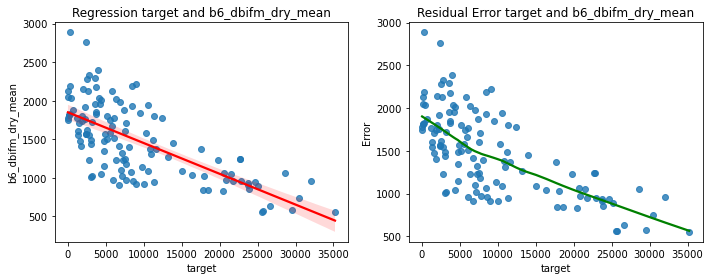

--------------------------------------------------
Residuals
slope:  -0.025122963142971154
intersept:  1142.5607482358078
r2:  -0.6761752579213621
P_value:  6.8571424588583804e-18
std error:  0.0024782573194569125
b3_dbifm_dry_mean
b3_dbifm_dry_mean
Regression
slope:  -0.025122963142971154
intersept:  1142.5607482358078
r2:  -0.6761752579213621
P_value:  6.8571424588583804e-18
std error:  0.0024782573194569125


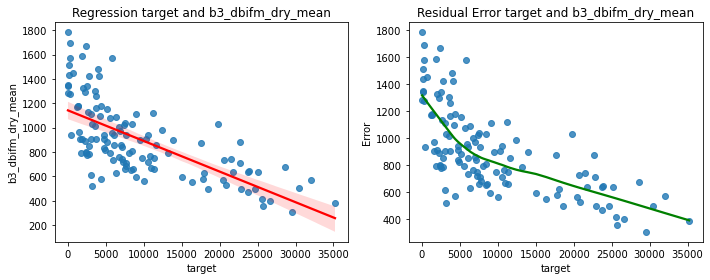

--------------------------------------------------
Residuals
slope:  -0.025122963142971154
intersept:  1142.5607482358078
r2:  -0.6761752579213621
P_value:  6.8571424588583804e-18
std error:  0.0024782573194569125
b2_dbifm_dry_mean
b2_dbifm_dry_mean
Regression
slope:  -0.01505130109000974
intersept:  792.1243036158775
r2:  -0.6639598748384516
P_value:  4.275290164255581e-17
std error:  0.001534685138113866


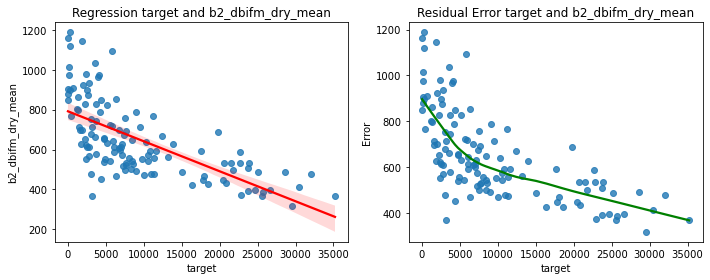

--------------------------------------------------
Residuals
slope:  -0.025122963142971154
intersept:  1142.5607482358078
r2:  -0.6761752579213621
P_value:  6.8571424588583804e-18
std error:  0.0024782573194569125
dbifmdry_GNDVI
dbifmdry_GNDVI
Regression
slope:  80.82526352418368
intersept:  4483809.953243626
r2:  0.75007679569032
P_value:  1.1824077008391461e-23
std error:  6.451984672789161


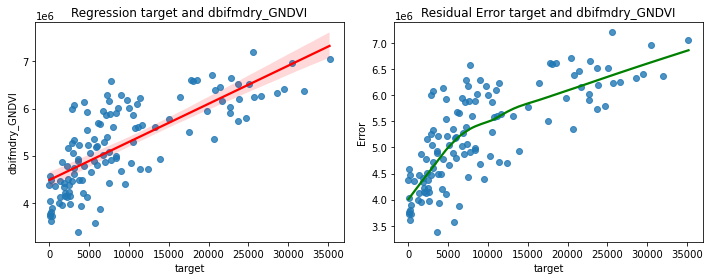

--------------------------------------------------
Residuals
slope:  -0.025122963142971154
intersept:  1142.5607482358078
r2:  -0.6761752579213621
P_value:  6.8571424588583804e-18
std error:  0.0024782573194569125
dbifmdry_MSR
dbifmdry_MSR
Regression
slope:  246.03467358236122
intersept:  3336304.671416224
r2:  0.8037600874284536
P_value:  2.740173914591607e-29
std error:  16.488191461891095


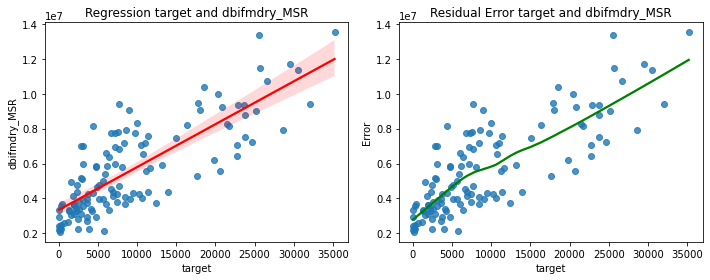

--------------------------------------------------
Residuals
slope:  -0.025122963142971154
intersept:  1142.5607482358078
r2:  -0.6761752579213621
P_value:  6.8571424588583804e-18
std error:  0.0024782573194569125
b2_dp1fm_dry_mean
b2_dp1fm_dry_mean
Regression
slope:  0.0014528552708054998
intersept:  15.91724443394819
r2:  0.7587446228964723
P_value:  1.8352560087203792e-24
std error:  0.00011292411713016465


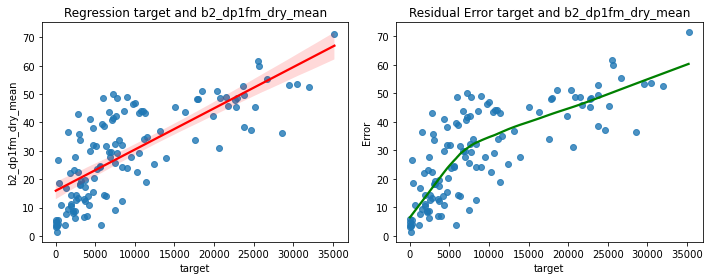

--------------------------------------------------
Residuals
slope:  -0.025122963142971154
intersept:  1142.5607482358078
r2:  -0.6761752579213621
P_value:  6.8571424588583804e-18
std error:  0.0024782573194569125
b3_dp1fm_dry_mean
b3_dp1fm_dry_mean
Regression
slope:  -0.0010675297879351136
intersept:  68.03627356148849
r2:  -0.6154411499016127
P_value:  2.828823838702946e-14
std error:  0.00012377716517978897


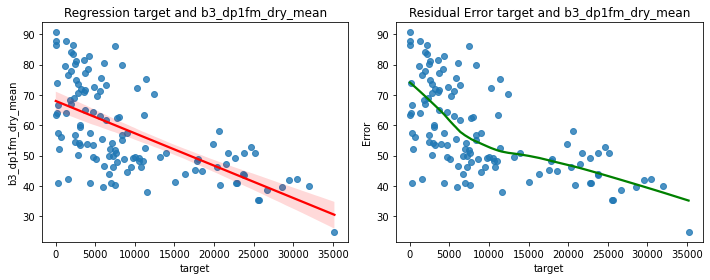

--------------------------------------------------
Residuals
slope:  -0.025122963142971154
intersept:  1142.5607482358078
r2:  -0.6761752579213621
P_value:  6.8571424588583804e-18
std error:  0.0024782573194569125
dbifmdry_NBR
dbifmdry_NBR
Regression
slope:  139.50558763889677
intersept:  503523.4501690613
r2:  0.696463203495022
P_value:  2.6818358811811594e-19
std error:  13.013418801957844


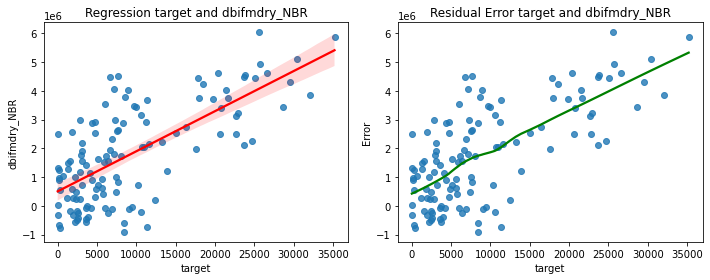

--------------------------------------------------
Residuals
slope:  -0.025122963142971154
intersept:  1142.5607482358078
r2:  -0.6761752579213621
P_value:  6.8571424588583804e-18
std error:  0.0024782573194569125
b5_dbifm_dry_mean
b5_dbifm_dry_mean
Regression
slope:  -0.041602111266595104
intersept:  2726.0151825789126
r2:  -0.6919344591514998
P_value:  5.658447706166789e-19
std error:  0.0039299210467130755


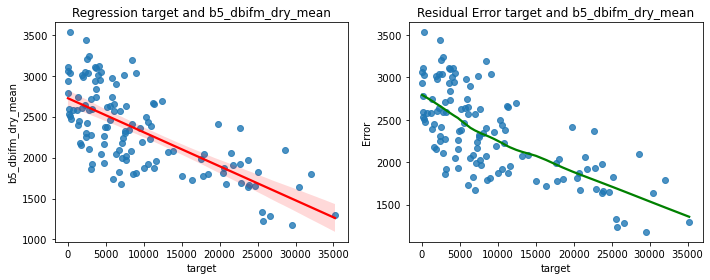

--------------------------------------------------
Residuals
slope:  -0.025122963142971154
intersept:  1142.5607482358078
r2:  -0.6761752579213621
P_value:  6.8571424588583804e-18
std error:  0.0024782573194569125
dbifmdry_NDVI
dbifmdry_NDVI
Regression
slope:  117.48855714885273
intersept:  2901981.6760550607
r2:  0.7805142688871751
P_value:  1.1812102573853045e-26
std error:  8.519432829914836


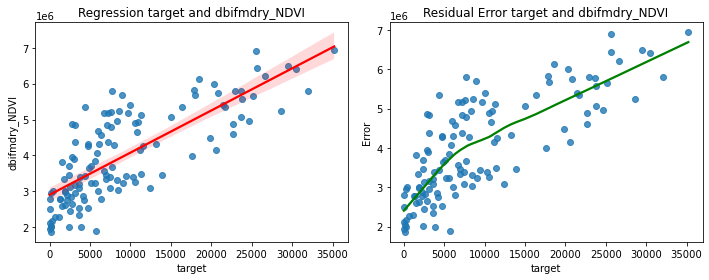

--------------------------------------------------
Residuals
slope:  -0.025122963142971154
intersept:  1142.5607482358078
r2:  -0.6761752579213621
P_value:  6.8571424588583804e-18
std error:  0.0024782573194569125
b1_hsd_mean
b1_hsd_mean
Regression
slope:  0.00010049697316910363
intersept:  102.0362676828428
r2:  0.6718224235553152
P_value:  1.3295299290570258e-17
std error:  1.0031551237220222e-05


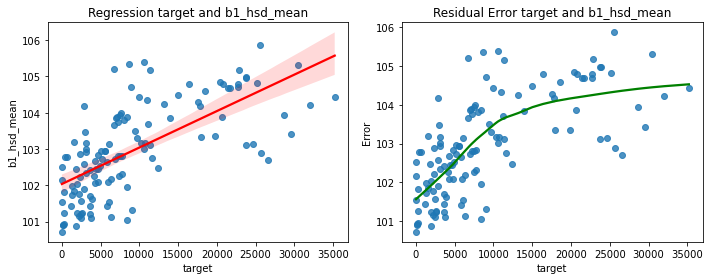

--------------------------------------------------
Residuals
slope:  -0.025122963142971154
intersept:  1142.5607482358078
r2:  -0.6761752579213621
P_value:  6.8571424588583804e-18
std error:  0.0024782573194569125
b1_h99_mean
b1_h99_mean
Regression
slope:  0.00036788745636721145
intersept:  107.98311952420428
r2:  0.6869227459294516
P_value:  1.2725499066077508e-18
std error:  3.523712951171214e-05


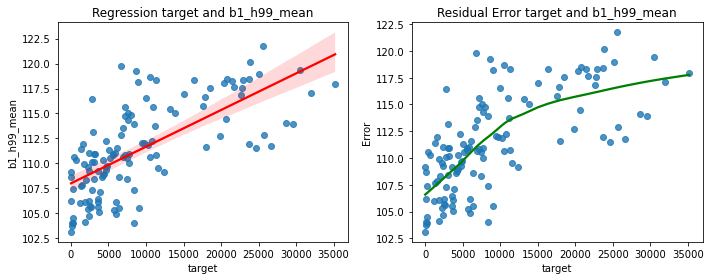

--------------------------------------------------
Residuals
slope:  -0.025122963142971154
intersept:  1142.5607482358078
r2:  -0.6761752579213621
P_value:  6.8571424588583804e-18
std error:  0.0024782573194569125
b1_dbifm_dry_mean
b1_dbifm_dry_mean
Regression
slope:  -0.009910935844506618
intersept:  478.5887760436094
r2:  -0.6556371209538602
P_value:  1.4175813667566473e-16
std error:  0.0010333845343479203


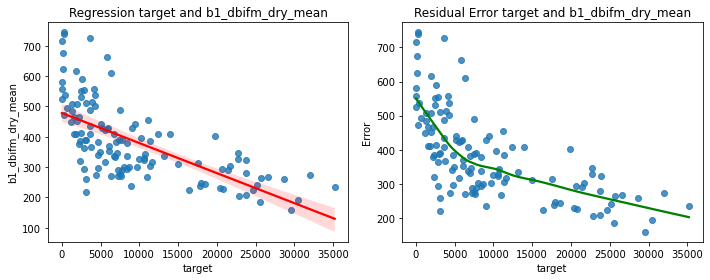

--------------------------------------------------
Residuals
slope:  -0.025122963142971154
intersept:  1142.5607482358078
r2:  -0.6761752579213621
P_value:  6.8571424588583804e-18
std error:  0.0024782573194569125
rh_tmin_mean
rh_tmin_mean
Regression
slope:  0.0006941914876748714
intersept:  3355.954114268341
r2:  0.3698447351546988
P_value:  2.361867056983241e-05
std error:  0.00015788445954983575


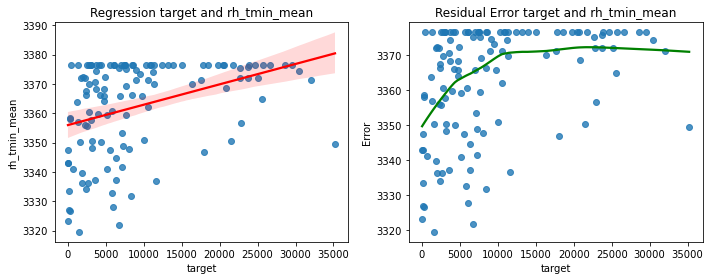

--------------------------------------------------
Residuals
slope:  -0.025122963142971154
intersept:  1142.5607482358078
r2:  -0.6761752579213621
P_value:  6.8571424588583804e-18
std error:  0.0024782573194569125
dbifmdry_CVI
dbifmdry_CVI
Regression
slope:  767.7299824917558
intersept:  38496664.62619134
r2:  0.6359994455872414
P_value:  2.0768088019557137e-15
std error:  84.33628138267339


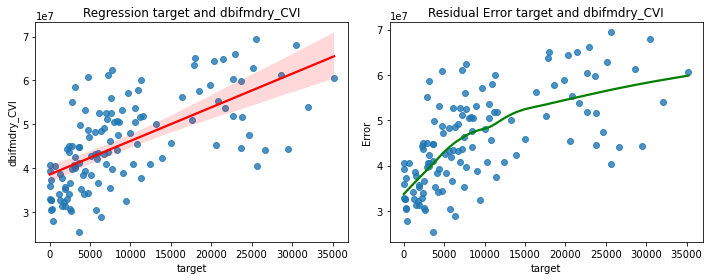

--------------------------------------------------
Residuals
slope:  -0.025122963142971154
intersept:  1142.5607482358078
r2:  -0.6761752579213621
P_value:  6.8571424588583804e-18
std error:  0.0024782573194569125
b1_ccw_dry_mean
b1_ccw_dry_mean
Regression
slope:  0.0022933958969848767
intersept:  18.383074040386724
r2:  0.7417971853893401
P_value:  6.534905627376825e-23
std error:  0.0001877125083002636


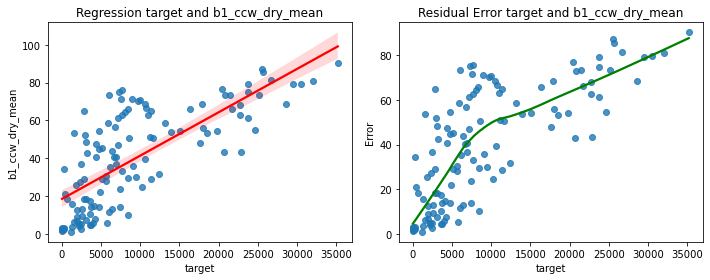

--------------------------------------------------
Residuals
slope:  -0.025122963142971154
intersept:  1142.5607482358078
r2:  -0.6761752579213621
P_value:  6.8571424588583804e-18
std error:  0.0024782573194569125
b1_dp1fm_dry_mean
b1_dp1fm_dry_mean
Regression
slope:  -0.00038781099225870455
intersept:  14.583958743819123
r2:  -0.3514614055469815
P_value:  6.266698672931891e-05
std error:  9.35259858555798e-05


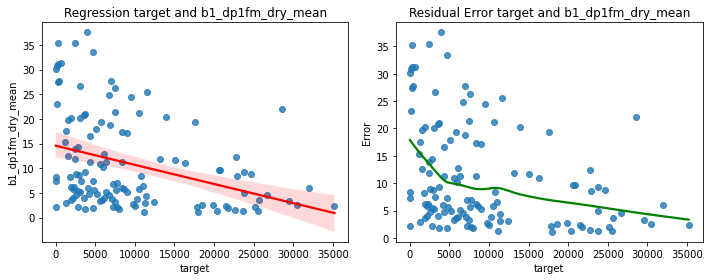

--------------------------------------------------
Residuals
slope:  -0.025122963142971154
intersept:  1142.5607482358078
r2:  -0.6761752579213621
P_value:  6.8571424588583804e-18
std error:  0.0024782573194569125
b1_wfp_dry_mean
b1_wfp_dry_mean
Regression
slope:  0.001693916974791045
intersept:  10.247107503554092
r2:  0.7633727468593516
P_value:  6.5705600849035595e-25
std error:  0.00012977170092342728


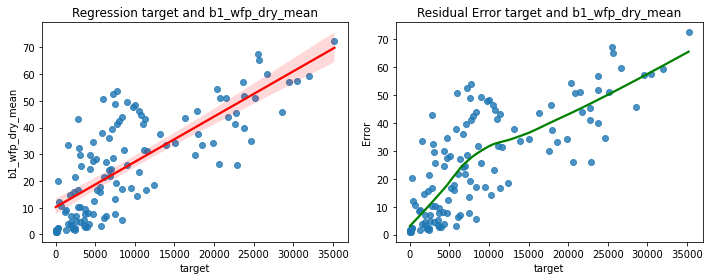

--------------------------------------------------
Residuals
slope:  -0.025122963142971154
intersept:  1142.5607482358078
r2:  -0.6761752579213621
P_value:  6.8571424588583804e-18
std error:  0.0024782573194569125
dbifmdry_GDVI
dbifmdry_GDVI
Regression
slope:  13.226343815203903
intersept:  1281707.9661479779
r2:  0.41468460203411966
P_value:  1.6814356234042372e-06
std error:  2.627645484627398


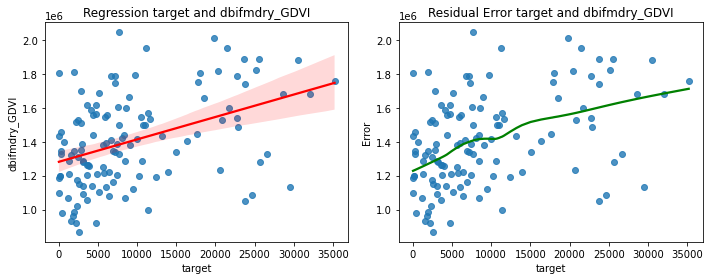

--------------------------------------------------
Residuals
slope:  -0.025122963142971154
intersept:  1142.5607482358078
r2:  -0.6761752579213621
P_value:  6.8571424588583804e-18
std error:  0.0024782573194569125
dbifmdry_GSAVI
dbifmdry_GSAVI
Regression
slope:  31.60121999867336
intersept:  2434028.2042072117
r2:  0.5671072597979484
P_value:  6.5663427746281315e-12
std error:  4.15526034725901


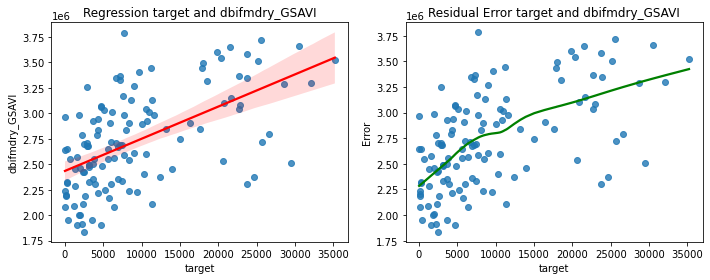

--------------------------------------------------
Residuals
slope:  -0.025122963142971154
intersept:  1142.5607482358078
r2:  -0.6761752579213621
P_value:  6.8571424588583804e-18
std error:  0.0024782573194569125


In [72]:
for i in df_ml.columns[1:]:
    print(i)
    value_x = 'target'
    value_y_loop = str(i)
    print(value_y_loop)
    plt.figure(figsize=(10,4))
    # left plot
    plt.subplot(1,2,1)
    sns.regplot(data = df_ml, x=value_x, y =value_y_loop, line_kws={"color":"red"})
    plt.xlabel(value_x)
    plt.ylabel(value_y_loop)
    plt.title("Regression {0} and {1}".format(value_x, value_y_loop))
    
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(df_ml[value_x], df_ml[value_y_loop])

    print("="*50)
    print("Regression")
    print("slope: ", slope)
    print("intersept: ", intercept)
    print("r2: ", r_value)
    print("P_value: ", p_value)
    print("std error: ", std_err)

    # right plot
    plt.subplot(1,2,2)
    sns.regplot(data=df_ml, x=value_x, y=value_y_loop, lowess=True, line_kws={"color":"green"})
    plt.xlabel(value_x)
    plt.ylabel("Error")
    plt.title("Residual Error {0} and {1}".format(value_x, value_y_loop))
    plt.tight_layout()
    plt.show()
    
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(df_ml[value_x], df_ml[value_y])

    print("-"*50)
    print("Residuals")
    print("slope: ", slope)
    print("intersept: ", intercept)
    print("r2: ", r_value)
    print("P_value: ", p_value)
    print("std error: ", std_err)

In [73]:
#df_ml.to_csv(, index=False)
df_ml.to_csv(r"{0}:\cdu\data\zonal_stats\output\{1}\plots\3_std_error\gt1000lt40000_3std_no_null.csv".format(drive, date), index=False)

In [74]:
df_ml.describe()

,target,b6_dbifm_dry_mean,b3_dbifm_dry_mean,b2_dbifm_dry_mean,dbifmdry_GNDVI,dbifmdry_MSR,b2_dp1fm_dry_mean,b3_dp1fm_dry_mean,dbifmdry_NBR,b5_dbifm_dry_mean,...,b1_hsd_mean,b1_h99_mean,b1_dbifm_dry_mean,rh_tmin_mean,dbifmdry_CVI,b1_ccw_dry_mean,b1_dp1fm_dry_mean,b1_wfp_dry_mean,dbifmdry_GDVI,dbifmdry_GSAVI
count,124.00,124.00,124.00,124.00,124.00,124.00,124.00,124.00,124.00,124.00,...,124.00,124.00,124.00,124.00,124.00,124.00,124.00,124.00,124.00,124.00
mean,9316.82,1478.40,908.49,651.89,5236844.71,5628566.43,29.45,58.09,1803272.46,2338.42,...,102.97,111.41,386.25,3362.42,45649469.77,39.75,10.97,26.03,1404935.48,2728451.21
std,8492.96,487.83,315.55,192.53,915166.80,2599732.95,16.26,14.73,1701187.90,510.63,...,1.27,4.55,128.38,15.94,10252047.83,26.26,9.37,18.85,270882.38,473257.50
min,18.48,554.11,307.78,317.22,3384468.00,2081843.00,1.44,24.83,-901894.00,1179.33,...,100.72,103.12,159.33,3319.60,25412028.00,1.00,1.11,1.00,869000.00,1836692.00
25%,2953.24,1053.92,669.04,514.29,4477021.25,3641033.75,14.46,47.15,301466.75,1933.40,...,102.02,108.36,292.38,3350.38,38255110.00,14.08,3.65,7.75,1201000.00,2357199.25
50%,6712.71,1487.12,867.76,612.42,5212165.00,4849950.00,29.67,53.83,1602935.00,2350.78,...,102.85,110.90,367.85,3369.55,44407419.00,40.67,7.33,25.07,1383500.00,2684281.50
75%,11805.38,1821.46,1097.81,766.79,6012889.00,7491126.75,43.61,70.65,3018913.00,2671.81,...,103.90,114.86,457.17,3376.50,52618964.75,63.25,17.37,41.60,1589500.00,3043732.25
max,35199.71,2886.00,1781.83,1187.67,7202744.00,13524145.00,71.33,90.67,6035524.00,3530.42,...,105.87,121.73,744.33,3376.50,69374485.00,90.22,37.56,72.56,2045000.00,3783767.00


In [75]:
# Check for null values
null_values = df_ml.isnull().sum()

In [76]:
null_values

target               0
b6_dbifm_dry_mean    0
b3_dbifm_dry_mean    0
b2_dbifm_dry_mean    0
dbifmdry_GNDVI       0
dbifmdry_MSR         0
b2_dp1fm_dry_mean    0
b3_dp1fm_dry_mean    0
dbifmdry_NBR         0
b5_dbifm_dry_mean    0
dbifmdry_NDVI        0
b1_hsd_mean          0
b1_h99_mean          0
b1_dbifm_dry_mean    0
rh_tmin_mean         0
dbifmdry_CVI         0
b1_ccw_dry_mean      0
b1_dp1fm_dry_mean    0
b1_wfp_dry_mean      0
dbifmdry_GDVI        0
dbifmdry_GSAVI       0
dtype: int64

In [77]:
df = df_ml

In [78]:
# Function to check if a value is in scientific notation
def is_scientific_notation(value):
    try:
        float_value = float(value)
        return '{:e}'.format(float_value) == value.lower()
    except ValueError:
        return False

# Check for scientific notation in each cell
for column in df.columns:
    for value in df[column]:
        if is_scientific_notation(str(value)):
            print(f"Column {column}: {value} is in scientific notation")

# Model

### Split off unseen data

In [79]:
# Creating a dataframe with 20%
# values of original dataframe
unseen_data = df_ml.sample(frac = 0.2)
 
# Creating dataframe with
# rest of the 80% values
model_data = df_ml.drop(unseen_data.index)

In [80]:
# randomly split data into train and test datasets, the user needs to define the variables 
xdata1 = model_data.iloc[:, 1:].astype('float32')
ydata1 = model_data[[value_x]].astype('float32')
ydata2 = ydata1.values
ydata = ydata2.ravel()
#y_data_float=ydata.astype("float32")

X_1, X_2, y_1, y_2 = train_test_split(xdata1, ydata, train_size=0.70)  
         
print(X_1.shape, y_1.shape)
print(X_2.shape, y_2.shape)

(69, 20) (69,)
(30, 20) (30,)


### Plot up Histograms for train and test datasets

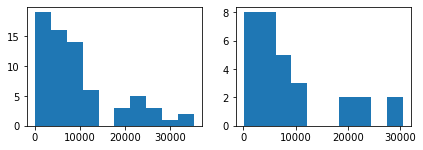

In [81]:
plt.subplot(2, 2, 1)
plt.hist(y_1)
plt.subplot(2, 2, 2)
plt.hist(y_2)
plt.tight_layout()

### Parameterise the Random Forest Regressor alogorthim

for details see: http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

In [82]:
#print(xdata1)

In [83]:
print(ydata)

[1.8942000e+03 1.5361500e+03 4.7360132e+03 1.5490861e+03 1.9475867e+03
 2.5408459e+03 1.7966666e+03 2.3572266e+03 2.6087600e+03 1.9209960e+03
 2.3895994e+03 2.1469141e+04 2.2699391e+04 3.1569021e+03 8.0314502e+03
 7.7112935e+03 3.1231201e+03 4.3709121e+03 3.9154500e+03 3.5199711e+04
 7.2031958e+03 3.6158325e+03 5.6064385e+03 3.6687932e+03 8.3762158e+03
 3.0861599e+03 2.9521801e+04 2.8320320e+03 6.0060000e+03 6.3602002e+03
 5.1737070e+03 2.4740100e+03 2.3737561e+04 9.0309453e+03 8.4137900e+03
 2.5701689e+04 1.1338128e+04 2.6636295e+04 1.2432934e+04 1.0273340e+04
 7.4328101e+03 7.2401177e+03 2.4024001e+02 2.4024001e+02 1.8480000e+01
 1.6632001e+02 2.9567999e+02 1.2936000e+02 6.6990000e+03 5.5439999e+01
 7.3919998e+01 1.1596200e+04 2.2176001e+03 4.7239990e+03 3.6483931e+03
 7.7153999e+03 4.7171880e+03 4.2688799e+03 3.0861599e+03 7.3919998e+01
 3.6036001e+03 6.3756001e+03 2.5585070e+04 2.2881072e+04 6.9467827e+03
 7.1505176e+03 1.0763322e+04 7.4785898e+03 5.7780801e+03 2.0631123e+04
 4.142

In [84]:
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV
import numpy as np

# Prepare data
#X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(xdata1, ydata, test_size=0.3, random_state=0)



if mdl == "rfr":

    # Define model
    model = rfr()
    
    # Define parameter grid
    param_grid = {
        'n_estimators': [2, 10, 30, 40, 50, 100, 150, 200, 300], #5, 10, 20, 30, 40, 
        'max_depth': [None, 2, 3, 4, 5, 10, 20],
        #'min_samples_split': [2, 3, 4, 5, 10],
        #'min_samples_leaf': [1, 2, 3, 4, 5],
        'max_features': ['auto', 'sqrt'],
        'bootstrap': [True, False]
    }
elif mdl == "gbr":
    # Define model
    model = gbr()

    # Define parameter grid
    param_grid = {
    'n_estimators': [2, 5, 10, 50, 100, 150, 200, 300], #5, 10, 20, 30, 40, 
    'learning_rate': [0.01, 0.1, 1.0],
    }

elif mdl == "abr":
    # Define model
    model = abr()

    # Define parameter grid
    param_grid = {
    'n_estimators': [2, 5, 10, 50, 100, 150, 200, 300], #5, 10, 20, 30, 40, 
    'learning_rate': [0.01, 0.1, 1.0],
    }
else:
    print("ERROR__"*100)

# Define custom scorer for RMSE
def custom_rmse_scorer(y_true, y_pred):
    rmse = -np.sqrt(mean_squared_error(y_true, y_pred))
    #print("rmse: ", rmse)
    return rmse

# Define custom scorer for MAE
def custom_mae_scorer(y_true, y_pred):
    mae = -mean_absolute_error(y_true, y_pred)
    #print("mae: ", mae)
    return mae

# Define custom scorer for MAE
def custom_r2_scorer(y_true, y_pred):
    # Mean of true target values
    y_mean = np.mean(y_true)

    # Calculate sum of squares of residuals
    ss_residual = np.sum((y_true - y_pred) ** 2)
    #print("ss_residual: ", ss_residual)

    # Calculate sum of squares of total
    ss_total = np.sum((y_true - y_mean) ** 2)
    #print("ss_total: ", ss_total)
    
    # Calculate R^2
    r2 = 1 - (ss_residual / ss_total)
    print("r2: ", r2)


    #r2 = r2_score(y_true, y_pred)
    #print("r2: ", r2)
    return r2

# Make it a scorer
#rmse_scorer = make_scorer(custom_rmse_scorer)
#mae_scorer = make_scorer(custom_mae_scorer)
r2_scorer = make_scorer(custom_r2_scorer)

# def custom_r2_scorer(y_true, y_pred):

#     r2 = r2_score(y_true, y_pred)
#     print("r2: ", r2)
#     return r2

# Make it a scorer
rmse_scorer = make_scorer(custom_rmse_scorer)
mae_scorer = make_scorer(custom_mae_scorer)
r2_scorer = make_scorer(custom_r2_scorer)
# -------------------------------------------------------------------

# Create GridSearchCV object with RMSE scoring
grid_search_rmse = GridSearchCV(model, param_grid, scoring=rmse_scorer, cv=5)
grid_search_rmse.fit(X_train, y_train)


print(mdl)
print("-"*100)
# Print the best score and parameters
print("RMSE Best Score: ", grid_search_rmse.best_score_)
print("RMSE Best Parameters: ", grid_search_rmse.best_params_)

# Create GridSearchCV object with MAE scoring
grid_search_mae = GridSearchCV(model, param_grid, scoring=mae_scorer, cv=5)
grid_search_mae.fit(X_train, y_train)

# Print the best score and parameters
print("MAE Best Score: ", grid_search_mae.best_score_)
print("MAE Best Parameters: ", grid_search_mae.best_params_)

# Create GridSearchCV object with r2 scoring
grid_search_r2 = GridSearchCV(model, param_grid, scoring=r2_scorer, cv=5)
grid_search_r2.fit(X_train, y_train)

# Print the best score and parameters
print("r2 Best Score: ", grid_search_r2.best_score_)
print("r2 Best Parameters: ", grid_search_r2.best_params_)

rfr
----------------------------------------------------------------------------------------------------
RMSE Best Score:  -4937.398581240508
RMSE Best Parameters:  {'bootstrap': True, 'max_depth': 3, 'max_features': 'sqrt', 'n_estimators': 50}
MAE Best Score:  -3799.308805385213
MAE Best Parameters:  {'bootstrap': False, 'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 10}
r2:  -0.6896043145649198
r2:  0.5095640346725492
r2:  0.5234134624499238
r2:  0.4107190747236519
r2:  0.65865056144081
r2:  -0.32053850160109
r2:  0.7120632762379115
r2:  0.704388874889208
r2:  0.4732767485053957
r2:  0.7865905260402433
r2:  -0.056393961855123464
r2:  0.6165473911360255
r2:  0.6778331317665797
r2:  0.45917663781587115
r2:  0.8046044012361947
r2:  -0.025526645633962897
r2:  0.6476134281139516
r2:  0.600251223092779
r2:  0.48523166514309135
r2:  0.7434489316407421
r2:  0.023500351379864615
r2:  0.6796254991525988
r2:  0.5961235189179791
r2:  0.4804557895443462
r2:  0.752794531252932
r2:  0.0295

r2:  0.6927313160941873
r2:  0.10631399380884654
r2:  0.7381069951516688
r2:  0.7039776619628407
r2:  0.4667735697751464
r2:  0.8115573029060035
r2:  0.14974486229709372
r2:  0.6861429450937062
r2:  0.7178354241507183
r2:  0.4674001462060169
r2:  0.7935073645579982
r2:  0.22037840898761207
r2:  0.679474362803789
r2:  0.7520795712214638
r2:  0.5138121680884913
r2:  0.8004886726245724
r2:  0.133200935797114
r2:  0.7241066672006271
r2:  0.7417224029626922
r2:  0.4715216063441191
r2:  0.7707053523110468
r2:  0.1539037899046719
r2:  0.6913722334281939
r2:  0.7012798472047179
r2:  0.507168608574433
r2:  0.7888687742992382
r2:  0.1219023132158914
r2:  0.6938711004625504
r2:  0.7154590881608198
r2:  0.497769901778749
r2:  0.7769632957654331
r2:  0.13794436523309872
r2:  0.6870461158814127
r2:  0.7181074989371121
r2:  0.46740961362764133
r2:  0.7954542730216465
r2:  -0.5732750106091449
r2:  0.7730620454135168
r2:  0.5446654900471919
r2:  0.009272231112934182
r2:  0.5278855931664524
r2:  -0.5493

r2:  -0.2123544298974167
r2:  0.46946067417920867
r2:  0.575435035199085
r2:  -0.4759161169206665
r2:  0.6925394620742726
r2:  -0.20431443200459642
r2:  0.4636018238558911
r2:  0.5747077348591205
r2:  -0.46354831718355616
r2:  0.6902184603576246
r2:  -0.21372783993559907
r2:  0.46453297775118685
r2:  0.5754350659262226
r2:  -0.4965419779685427
r2:  0.4921222699374539
r2:  0.4736448389542831
r2:  0.4169601072627508
r2:  0.6456774518136059
r2:  -0.15187428847445172
r2:  0.5215309547465623
r2:  0.6683489614844598
r2:  0.3407703882246952
r2:  0.7781162758827121
r2:  0.05990060018815857
r2:  0.6406132496143573
r2:  0.620332549491954
r2:  0.40778481184960114
r2:  0.7953561306703292
r2:  -0.1733258424597246
r2:  0.6715069414258759
r2:  0.5971469048517348
r2:  0.36319476592012434
r2:  0.7964229470622711
r2:  0.10803413012016683
r2:  0.6747527538485408
r2:  0.6622559557105298
r2:  0.39745626333383843
r2:  0.8085995074570566
r2:  0.07052214907947807
r2:  0.612489092576519
r2:  0.6590505049677275

r2:  -0.13863924660449167
r2:  0.5002337371286937
r2:  0.5837540310648275
r2:  -0.42604618528606153
r2:  0.6780934788202334
r2:  -0.12022241935003009
r2:  0.5199336727426581
r2:  0.5778782650715437
r2:  -0.42509117031291765
r2:  0.6771018309556766
r2:  -0.12306118069999772
r2:  0.5375314370002204
r2:  0.58285981690784
r2:  -0.408880400787178
r2:  0.6811997111152319
r2:  -0.1229692879491684
r2:  0.5185084084698115
r2:  0.5885758054412666
r2:  -0.47585140286340866
r2:  0.6849692512036881
r2:  -0.13357209355047184
r2:  0.5248300688599443
r2:  0.5852765305001582
r2:  -0.39383093077613673
r2:  0.687194285242453
r2:  -0.13614658590031214
r2:  0.5207508385707471
r2:  0.5821609439189153
r2:  -0.41080381181424497
r2:  0.36707490768864415
r2:  0.7122811778241536
r2:  0.41136402067237443
r2:  0.7429647097193964
r2:  -0.03130924071240271
r2:  0.6277612226846865
r2:  0.6133358442360866
r2:  0.38198127608551036
r2:  0.7975545997195423
r2:  0.0980300030005844
r2:  0.6810973565229526
r2:  0.6277756548

In [88]:
# Get best RMSE parameters
#best_params = grid_search_rmse.best_params_
best_rf = grid_search_rmse.best_estimator_
fac = "RMSE"

In [86]:
# Get best MAE parameters
#best_params = grid_search_rmse.best_params_
best_rf = grid_search_mae.best_estimator_
fac = "MAE"


In [87]:
# Get best R2 parameters
#best_params = grid_search_rmse.best_params_
best_rf = grid_search_r2.best_estimator_
fac = "r2"

### Fit random forest regressor model and compute variable importance score 

may need to restrict the number of variables for the bar graph to be legible



In [89]:
#rfrLCHM = rfrModel_1.fit(X_1, y_1)
rfrLCHM = best_rf.fit(X_1, y_1)

##### good info on the feature importance score - http://stackoverflow.com/questions/15810339/how-are-feature-importances-in-randomforestclassifier-determined

Fitted model r2 = 0.85
Fitted model mse = 11181212.14
RMSE = 3343.832
n = 69


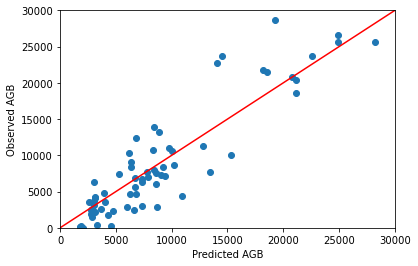

In [90]:
feature_importance = rfrLCHM.feature_importances_

### TRY THIS
# use "feature importance" scores to see what the top 10 important features are
fi = enumerate(rfrLCHM.feature_importances_)
cols = xdata1.columns
fiResult = [(value,cols[i]) for (i,value) in fi]
#fiResult = [(value,cols[i]) for (i,value) in fi if value > 0.001]
## Change the value 0.04 which we picked empirically to give us 10 variables
## try running this code after changing the value up and down so you get more or less variables
## do you see how this might be useful in refining the model?
## Here is the code in case you mess up the line above
## [(value,cols[i]) for (i,value) in fi if value > 0.04]
#print fiResult

print('Fitted model r2 =' ,  format(rfrLCHM.score(X_1, y_1), '.2f'))
print('Fitted model mse =', format(np.mean((y_1 - rfrLCHM.predict(X_1))**2), '.2f'))
print('RMSE =', format(np.sqrt(np.mean((y_1 - rfrLCHM.predict(X_1))**2)), '.3f'))
print('n =', len(y_1))
plt.scatter(rfrLCHM.predict(X_1), y_1,)  
# data for the 1 for 1 line
x = [-1,30000]
y = [-1,30000]

#sets the limits of the axis
plt.xlim(-1,30000)
plt.ylim(-1, 30000)

plt.ylabel('Observed AGB')

plt.xlabel('Predicted AGB')

# 1 for 1 line

plt.plot(x, y, color = 'r')

plt.savefig(os.path.join(output_, "{0}_{1}_{2}_{3}_train.pdf".format(var_, d_type, fac, mdl)), dpi=300)  # dpi sets the resolution in dots per inch
plt.show()

Predicted data r2 = 0.5828877506951409
MSE = 30944745.680
RMSE = 5562.800
bias = 781.496
n = 30


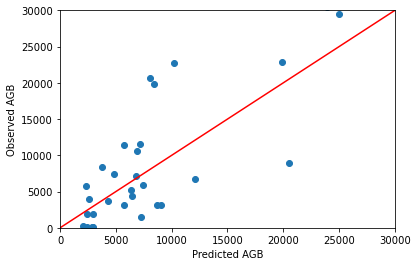

In [91]:
y2_predict = rfrLCHM.predict(X_2)

print('Predicted data r2 =', rfrLCHM.score(X_2, y_2))
print('MSE =', format(np.mean((y_2 - rfrLCHM.predict(X_2))** 2), '.3f'))
print('RMSE =', format(np.sqrt(np.mean((y2_predict - y_2) ** 2)), '.3f'))
#print 'explained_var =',format(explained_variance_score(y_2, y2_predict),  '.3f') 
print('bias =' , format(np.mean(y_2) - np.mean(y2_predict), '.3f'))
print('n =' , len(y_2))

plt.scatter(y2_predict, y_2)# ,s=10, c='b', marker='o')
# data for the 1 for 1 line
x = [-1,30000]
y = [-1,30000]

#sets the limits of the axis
plt.xlim(-1,30000)
plt.ylim(-1, 30000)
plt.ylabel('Observed AGB')
plt.xlabel('Predicted AGB')
# 1 for 1 line
plt.plot(x, y, color = 'r')

# Save the plot
plt.savefig(os.path.join(output_, "{0}_{1}_{2}_{3}_test_data.png".format(var_, d_type, fac, mdl)), dpi=300)  # dpi sets the resolution in dots per inch
plt.show()

                 band                      n
9       dbifmdry_NDVI      0.128175786108587
4        dbifmdry_MSR    0.12011111264989069
11        b1_h99_mean    0.08665705025845616
17    b1_wfp_dry_mean    0.07750818441514414
3      dbifmdry_GNDVI    0.07143919508322263
15    b1_ccw_dry_mean    0.06986726872248615
2   b2_dbifm_dry_mean    0.06711948055811473
1   b3_dbifm_dry_mean    0.06230787267614554
0   b6_dbifm_dry_mean    0.06193067488244464
10        b1_hsd_mean   0.058877728786363194
8   b5_dbifm_dry_mean   0.037008625254768904
7        dbifmdry_NBR    0.03504641132624757
5   b2_dp1fm_dry_mean    0.03401442858716477
6   b3_dp1fm_dry_mean   0.032546934166141114
14       dbifmdry_CVI   0.021056044144884913
16  b1_dp1fm_dry_mean   0.012936092181930377
12  b1_dbifm_dry_mean   0.010527048060877764
13       rh_tmin_mean    0.00566285760235036
19     dbifmdry_GSAVI  0.0039184707231370505
18      dbifmdry_GDVI  0.0032887338116423057


<Figure size 720x432 with 0 Axes>

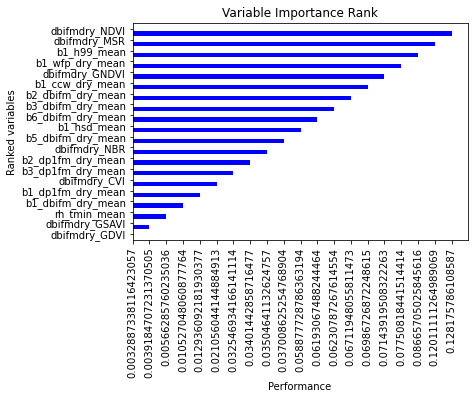

In [92]:
fiResult = np.array(fiResult)
score = (fiResult[:,0])
band = fiResult[:,1]
a = fiResult[np.argsort(fiResult[:, 1])]

df_band = pd.DataFrame(dict(band=band,n=score))
df_band['n'].astype('float')
dfsort = df_band.sort_values(['n'], ascending=[False])
print(dfsort)
 
## my complicated way to get the bar plot to sort in ascending order and display the assocated band names in the y axis
dfsort2 = df_band.sort_values(['n'], ascending=[True])
b = dfsort2[['band']]
c = b.values.tolist()
# convert the list of band names in the correct order to a string
e = str(c)
# strips all the rubbish from the string
f = e.replace('[','').replace(']','').replace("'",'').replace(",",' ')
# convert the cleaned up string back into a list to plot the band names in the bar graph
g = f.split()
 
ind = np.arange(len(df_band))
width = 0.4
 
# Create a figure with a specific size
plt.figure(figsize=(10, 6))

fig, ax = plt.subplots()
ax.barh(ind, dfsort2.n, width, color='blue')
ax.set(yticks=ind + width, yticklabels= g, ylim=[2*width - 1, len(df_band)])
ax.set_xlabel('Performance')
ax.set_ylabel('Ranked variables')
plt.xticks(rotation='vertical')
ax.set_title('Variable Importance Rank')

# plt.show()
# fig.savefig('Band_Importance_Score.pdf',dpi=600)# save out your figure to a pdf 
# Save the plot
plt.savefig(os.path.join(output_, "{0}_{1}_{2}_{3}_Band_Importance_Score.pdf".format(var_, d_type, fac, mdl)), dpi=300)  # dpi sets the resolution in dots per inch
plt.show()

### Predict the selected model on the test data

In [93]:
# plt.scatter(y2_predict, y_2)
# plt.show()

In [94]:
df_band.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   band    20 non-null     object
 1   n       20 non-null     object
dtypes: object(2)
memory usage: 448.0+ bytes


In [95]:
dfsort['n'].astype('float')
dfsort.info()
dfsort['n'] = dfsort['n'].astype('float')
dfsort.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 9 to 18
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   band    20 non-null     object
 1   n       20 non-null     object
dtypes: object(2)
memory usage: 480.0+ bytes
<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 9 to 18
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   band    20 non-null     object 
 1   n       20 non-null     float64
dtypes: float64(1), object(1)
memory usage: 480.0+ bytes


In [96]:
#Plot has value at the top with very small n value 

In [97]:
#Plot has value at the top with very small n value 
df_var = dfsort.head(10)

In [98]:
#df_var = dfsort[dfsort['n'] > 0.01]

In [99]:
column_var = df_var.band.tolist()

In [100]:
column_var.insert(0, 'target')

In [101]:
column_var

['target',
 'dbifmdry_NDVI',
 'dbifmdry_MSR',
 'b1_h99_mean',
 'b1_wfp_dry_mean',
 'dbifmdry_GNDVI',
 'b1_ccw_dry_mean',
 'b2_dbifm_dry_mean',
 'b3_dbifm_dry_mean',
 'b6_dbifm_dry_mean',
 'b1_hsd_mean']

In [102]:
model_data

,target,b6_dbifm_dry_mean,b3_dbifm_dry_mean,b2_dbifm_dry_mean,dbifmdry_GNDVI,dbifmdry_MSR,b2_dp1fm_dry_mean,b3_dp1fm_dry_mean,dbifmdry_NBR,b5_dbifm_dry_mean,...,b1_hsd_mean,b1_h99_mean,b1_dbifm_dry_mean,rh_tmin_mean,dbifmdry_CVI,b1_ccw_dry_mean,b1_dp1fm_dry_mean,b1_wfp_dry_mean,dbifmdry_GDVI,dbifmdry_GSAVI
7,1894.20,1741.67,1585.44,1144.89,4415426.00,3649511.00,10.67,84.11,2582020.00,3013.67,...,100.87,104.14,616.44,3339.70,35763554.00,6.89,3.67,3.44,1809000.00,2982851.00
8,1536.15,1707.75,968.67,714.08,3954276.00,3047909.00,9.50,76.50,-175857.00,2448.58,...,101.86,107.86,465.33,3319.60,31292203.00,6.33,12.50,3.90,934000.00,1903015.00
10,4736.01,1482.25,941.83,657.92,4118174.00,2945566.00,15.33,49.58,310559.00,1935.75,...,102.83,109.67,384.42,3364.00,34378789.00,14.08,33.50,7.75,920000.00,1907658.00
12,1549.09,1477.33,904.00,696.33,4874816.00,4948288.00,36.50,42.42,1552760.00,2176.00,...,103.20,111.97,410.83,3350.30,37696525.00,53.50,19.75,33.58,1324000.00,2573872.00
17,1947.59,2146.44,1323.88,922.62,4217623.00,3090187.00,11.31,67.06,274190.00,2980.88,...,102.03,108.33,507.38,3372.40,35281702.00,8.80,20.25,4.53,1345000.00,2463671.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,11365.20,1804.81,752.25,558.06,4723404.00,4389158.00,18.88,75.44,-734900.00,2649.06,...,103.12,110.78,385.69,3369.90,37604347.00,28.88,4.31,16.62,999000.00,2106114.00
181,23704.69,909.44,639.89,506.44,6511548.00,9359865.00,53.00,44.00,4497579.00,1976.44,...,104.97,118.41,279.44,3372.00,59773040.00,79.00,1.33,56.89,1889000.00,3586255.00
182,32025.21,961.92,574.17,479.17,6369837.00,9398624.00,52.58,39.83,3841717.00,1795.25,...,104.22,117.05,273.33,3371.20,54037421.00,81.00,6.08,59.33,1681000.00,3300825.00
183,22731.51,1242.67,713.33,534.67,5906478.00,7059421.00,45.33,41.00,2511305.00,1926.33,...,104.70,117.52,328.00,3372.00,51883004.00,67.92,12.33,45.58,1541000.00,3037850.00


In [103]:
select_df = model_data[column_var]

In [104]:
df_corr = select_df.corr()
df_corr

,target,dbifmdry_NDVI,dbifmdry_MSR,b1_h99_mean,b1_wfp_dry_mean,dbifmdry_GNDVI,b1_ccw_dry_mean,b2_dbifm_dry_mean,b3_dbifm_dry_mean,b6_dbifm_dry_mean,b1_hsd_mean
target,1.00,0.77,0.79,0.67,0.75,0.74,0.72,-0.65,-0.66,-0.68,0.65
dbifmdry_NDVI,0.77,1.00,0.99,0.81,0.92,0.96,0.91,-0.85,-0.88,-0.91,0.78
dbifmdry_MSR,0.79,0.99,1.00,0.78,0.90,0.93,0.88,-0.81,-0.85,-0.89,0.75
b1_h99_mean,0.67,0.81,0.78,1.00,0.79,0.82,0.80,-0.73,-0.73,-0.77,0.98
b1_wfp_dry_mean,0.75,0.92,0.90,0.79,1.00,0.88,0.99,-0.75,-0.79,-0.83,0.76
dbifmdry_GNDVI,0.74,0.96,0.93,0.82,0.88,1.00,0.88,-0.85,-0.82,-0.87,0.81
b1_ccw_dry_mean,0.72,0.91,0.88,0.80,0.99,0.88,1.00,-0.77,-0.81,-0.83,0.78
b2_dbifm_dry_mean,-0.65,-0.85,-0.81,-0.73,-0.75,-0.85,-0.77,1.00,0.98,0.83,-0.72
b3_dbifm_dry_mean,-0.66,-0.88,-0.85,-0.73,-0.79,-0.82,-0.81,0.98,1.00,0.86,-0.72
b6_dbifm_dry_mean,-0.68,-0.91,-0.89,-0.77,-0.83,-0.87,-0.83,0.83,0.86,1.00,-0.76


In [105]:
dfsort.to_csv(os.path.join(output_, "{0}_{1}_{2}_{3}_variable_score.csv".format(var_, d_type, fac, mdl)))
df_corr.to_csv(os.path.join(output_, "{0}_{1}_{2}_{3}_select_variable_corrolation.csv".format(var_, d_type, fac, mdl)))

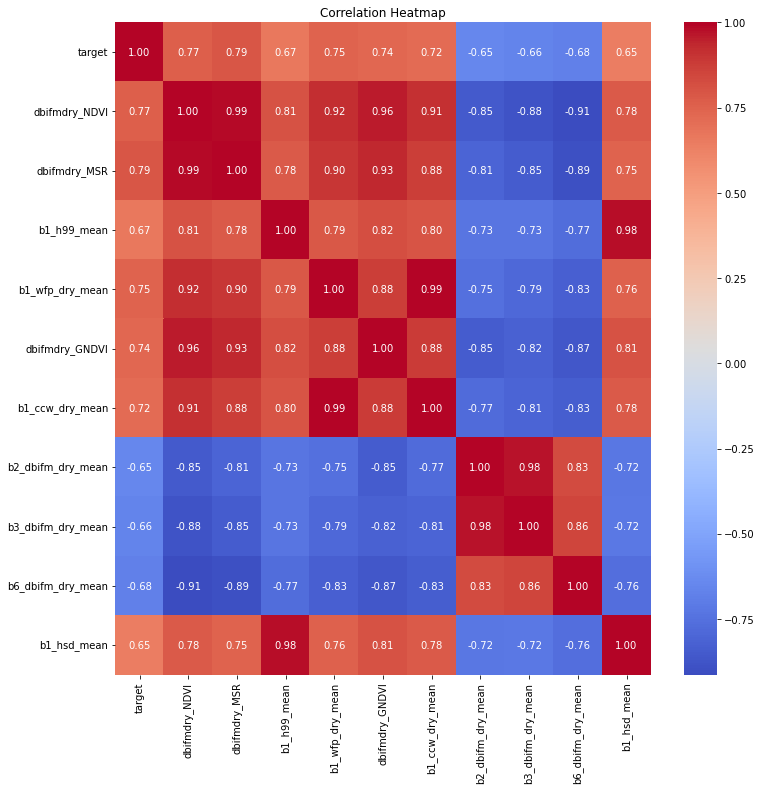

In [106]:
# Create heatmap
plt.figure(figsize=(12, 12))
sns.heatmap(df_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')

# Save the plot
plt.savefig(os.path.join(output_, "{0}_{1}_{2}_{3}_variable_score.png".format(var_, d_type, fac, mdl)), dpi=300)  # dpi sets the resolution in dots per inch
plt.show()

In [107]:
select_df

,target,dbifmdry_NDVI,dbifmdry_MSR,b1_h99_mean,b1_wfp_dry_mean,dbifmdry_GNDVI,b1_ccw_dry_mean,b2_dbifm_dry_mean,b3_dbifm_dry_mean,b6_dbifm_dry_mean,b1_hsd_mean
7,1894.20,3014544.00,3649511.00,104.14,3.44,4415426.00,6.89,1144.89,1585.44,1741.67,100.87
8,1536.15,2599388.00,3047909.00,107.86,3.90,3954276.00,6.33,714.08,968.67,1707.75,101.86
10,4736.01,2525814.00,2945566.00,109.67,7.75,4118174.00,14.08,657.92,941.83,1482.25,102.83
12,1549.09,3816689.00,4948288.00,111.97,33.58,4874816.00,53.50,696.33,904.00,1477.33,103.20
17,1947.59,2629526.00,3090187.00,108.33,4.53,4217623.00,8.80,922.62,1323.88,2146.44,102.03
...,...,...,...,...,...,...,...,...,...,...,...
180,11365.20,3486358.00,4389158.00,110.78,16.62,4723404.00,28.88,558.06,752.25,1804.81,103.12
181,23704.69,5787739.00,9359865.00,118.41,56.89,6511548.00,79.00,506.44,639.89,909.44,104.97
182,32025.21,5801024.00,9398624.00,117.05,59.33,6369837.00,81.00,479.17,574.17,961.92,104.22
183,22731.51,4885222.00,7059421.00,117.52,45.58,5906478.00,67.92,534.67,713.33,1242.67,104.70


# Rerun on Selected data

In [108]:
xdata1 = select_df.iloc[:, 1:].astype('float32')
ydata1 = select_df[[value_x]].astype('float32')
ydata2 = ydata1.values
ydata = ydata2.ravel()

X_1, X_2, y_1, y_2 = train_test_split(xdata1, ydata, train_size=0.70)  
         
print(X_1.shape, y_1.shape)
print(X_2.shape, y_2.shape)

(69, 10) (69,)
(30, 10) (30,)


In [109]:
rng = np.random.RandomState(1)
rfrModel_1 = rfr(n_estimators=100, random_state=rng)
#rfrModel_1 = rfr(dtr(max_depth=None), n_estimators=100, min_samples_split=2, min_samples_leaf=1, random_state=rng)
rfrModel_1

#Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

RandomForestRegressor(random_state=RandomState(MT19937) at 0x12885FF4488)

In [110]:
rfrLCHM = rfrModel_1.fit(X_1, y_1)

In [111]:
select_df

,target,dbifmdry_NDVI,dbifmdry_MSR,b1_h99_mean,b1_wfp_dry_mean,dbifmdry_GNDVI,b1_ccw_dry_mean,b2_dbifm_dry_mean,b3_dbifm_dry_mean,b6_dbifm_dry_mean,b1_hsd_mean
7,1894.20,3014544.00,3649511.00,104.14,3.44,4415426.00,6.89,1144.89,1585.44,1741.67,100.87
8,1536.15,2599388.00,3047909.00,107.86,3.90,3954276.00,6.33,714.08,968.67,1707.75,101.86
10,4736.01,2525814.00,2945566.00,109.67,7.75,4118174.00,14.08,657.92,941.83,1482.25,102.83
12,1549.09,3816689.00,4948288.00,111.97,33.58,4874816.00,53.50,696.33,904.00,1477.33,103.20
17,1947.59,2629526.00,3090187.00,108.33,4.53,4217623.00,8.80,922.62,1323.88,2146.44,102.03
...,...,...,...,...,...,...,...,...,...,...,...
180,11365.20,3486358.00,4389158.00,110.78,16.62,4723404.00,28.88,558.06,752.25,1804.81,103.12
181,23704.69,5787739.00,9359865.00,118.41,56.89,6511548.00,79.00,506.44,639.89,909.44,104.97
182,32025.21,5801024.00,9398624.00,117.05,59.33,6369837.00,81.00,479.17,574.17,961.92,104.22
183,22731.51,4885222.00,7059421.00,117.52,45.58,5906478.00,67.92,534.67,713.33,1242.67,104.70


## Re-train model on selected paramiters

Fitted model r2 = 0.93
Fitted model mse = 5045171.90
n = 69


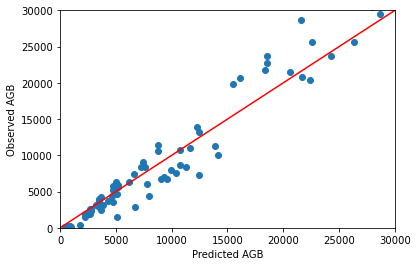

In [112]:
feature_importance = rfrModel_1.feature_importances_

### TRY THIS
# use "feature importance" scores to see what the top 10 important features are
fi = enumerate(rfrModel_1.feature_importances_)
cols = xdata1.columns
fiResult = [(value,cols[i]) for (i,value) in fi]
#fiResult = [(value,cols[i]) for (i,value) in fi if value > 0.001]
## Change the value 0.04 which we picked empirically to give us 10 variables
## try running this code after changing the value up and down so you get more or less variables
## do you see how this might be useful in refining the model?
## Here is the code in case you mess up the line above
## [(value,cols[i]) for (i,value) in fi if value > 0.04]
#print fiResult

print('Fitted model r2 =' ,  format(rfrLCHM.score(X_1, y_1), '.2f'))
print('Fitted model mse =', format(np.mean((y_1 - rfrLCHM.predict(X_1))**2), '.2f'))
print('n =', len(y_1))
plt.scatter(rfrLCHM.predict(X_1), y_1,)  
# data for the 1 for 1 line
x = [-1,30000]
y = [-1,30000]

#sets the limits of the axis
plt.xlim(-1,30000)
plt.ylim(-1,30000)

plt.ylabel('Observed AGB')

plt.xlabel('Predicted AGB')

# 1 for 1 line

plt.plot(x, y, color = 'r')

plt.savefig(os.path.join(output_, "{0}_{1}_{2}_{3}_sel_train.pdf".format(var_, d_type, fac, mdl)), dpi=300)  # dpi sets the resolution in dots per inch
plt.show()

                band                    n
4     dbifmdry_GNDVI   0.2660367089193462
2        b1_h99_mean  0.11105676482843348
9        b1_hsd_mean  0.09671167019827401
7  b3_dbifm_dry_mean  0.09091369103302897
0      dbifmdry_NDVI  0.08945573892203106
1       dbifmdry_MSR  0.08079721830262189
5    b1_ccw_dry_mean  0.07818539112741871
8  b6_dbifm_dry_mean  0.07459811126642764
6  b2_dbifm_dry_mean  0.07259210116370741
3    b1_wfp_dry_mean  0.03965260423871054


<Figure size 720x432 with 0 Axes>

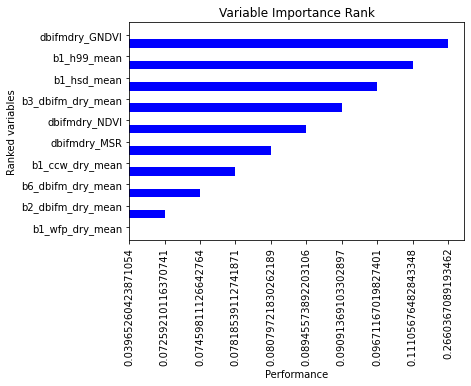

In [113]:
fiResult = np.array(fiResult)
score = (fiResult[:,0])
band = fiResult[:,1]
a = fiResult[np.argsort(fiResult[:, 1])]

df_band = pd.DataFrame(dict(band=band,n=score))
df_band['n'].astype('float')
dfsort = df_band.sort_values(['n'], ascending=[False])
print(dfsort)
 
## my complicated way to get the bar plot to sort in ascending order and display the assocated band names in the y axis
dfsort2 = df_band.sort_values(['n'], ascending=[True])
b = dfsort2[['band']]
c = b.values.tolist()
# convert the list of band names in the correct order to a string
e = str(c)
# strips all the rubbish from the string
f = e.replace('[','').replace(']','').replace("'",'').replace(",",' ')
# convert the cleaned up string back into a list to plot the band names in the bar graph
g = f.split()
 
ind = np.arange(len(df_band))
width = 0.4
 
# Create a figure with a specific size
plt.figure(figsize=(10, 6))

fig, ax = plt.subplots()
ax.barh(ind, dfsort2.n, width, color='blue')
ax.set(yticks=ind + width, yticklabels= g, ylim=[2*width - 1, len(df_band)])
ax.set_xlabel('Performance')
ax.set_ylabel('Ranked variables')
plt.xticks(rotation='vertical')
ax.set_title('Variable Importance Rank')

# plt.show()
# fig.savefig('Band_Importance_Score.pdf',dpi=600)# save out your figure to a pdf 
# Save the plot
plt.savefig(os.path.join(output_, "{0}_{1}_{2}_{3}_select_Band_Importance_Score.pdf".format(var_, d_type, fac, mdl)), dpi=300)  # dpi sets the resolution in dots per inch
plt.show()

Predicted data r2 = 0.581344336750243
MSE = 30070347.213
RMSE = 5483.644
bias = -456.419
n = 30


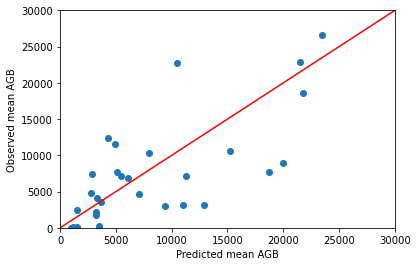

In [114]:
y2_predict = rfrLCHM.predict(X_2)

print('Predicted data r2 =', rfrLCHM.score(X_2, y_2))
print('MSE =', format(np.mean((y_2 - rfrLCHM.predict(X_2))** 2), '.3f'))
print('RMSE =', format(np.sqrt(np.mean((y2_predict - y_2) ** 2)), '.3f'))
#print 'explained_var =',format(explained_variance_score(y_2, y2_predict),  '.3f') 
print('bias =' , format(np.mean(y_2) - np.mean(y2_predict), '.3f'))
print('n =' , len(y_2))

plt.scatter(y2_predict, y_2) # ,s=10, c='b', marker='o')
# data for the 1 for 1 line
x = [-1,30000]
y = [-1,30000]

#sets the limits of the axis
plt.xlim(-1,30000)
plt.ylim(-1, 30000)
plt.ylabel('Observed mean AGB')
plt.xlabel('Predicted mean AGB')
# 1 for 1 line
plt.plot(x, y, color = 'r')

# Save the plot
plt.savefig(os.path.join(output_, "{0}_{1}_{2}_{3}_sel_test_data.png".format(var_, d_type, fac, mdl)), dpi=300)  # dpi sets the resolution in dots per inch
plt.show()

In [115]:
variable_imp_list = dfsort.band.to_list()

# =================================================================

# STOP - do you realy want to save this model?

# remember to change the cPickle file name !!

# Save current fitted model and apply to unseen validation data 

In [116]:
import pickle

#rfrL8CHM = rfr()
#rfrL8CHM.fit(X_1, y_1)

with open("{0}_{1}_{2}_{3}_sel_model".format(var_, d_type, fac, mdl), 'wb') as f:
    pickle.dump(rfrLCHM, f)

In [117]:
# read in your validation dataset which has never been seen by rfr model - NOTE in this example I am just reading the same data used to train the model

unseen_data

,target,b6_dbifm_dry_mean,b3_dbifm_dry_mean,b2_dbifm_dry_mean,dbifmdry_GNDVI,dbifmdry_MSR,b2_dp1fm_dry_mean,b3_dp1fm_dry_mean,dbifmdry_NBR,b5_dbifm_dry_mean,...,b1_hsd_mean,b1_h99_mean,b1_dbifm_dry_mean,rh_tmin_mean,dbifmdry_CVI,b1_ccw_dry_mean,b1_dp1fm_dry_mean,b1_wfp_dry_mean,dbifmdry_GDVI,dbifmdry_GSAVI
31,3742.20,1849.25,908.67,579.33,5216853.00,4243014.00,19.75,77.33,-18965.00,3093.00,...,101.11,105.07,366.83,3374.25,49890556.00,14.08,1.75,7.75,1263000.00,2552890.00
166,23807.33,856.00,646.50,534.00,6200640.00,8774365.00,49.50,43.50,4535589.00,1665.00,...,104.98,120.17,322.50,3376.50,51583765.00,74.78,5.00,52.00,1743000.00,3347203.00
32,11180.40,1493.22,1120.56,767.67,5598278.00,5578144.00,34.00,63.56,2909048.00,2664.44,...,103.70,113.74,454.44,3374.20,51745996.00,51.00,1.22,31.78,1951000.00,3449028.00
184,9471.00,1845.44,897.67,712.67,4404715.00,4295028.00,27.78,46.33,-32626.00,2360.00,...,103.50,112.07,441.11,3373.30,32433582.00,30.11,24.44,17.22,1121000.00,2228628.00
36,4872.78,1570.33,820.92,554.92,5217954.00,4662878.00,20.33,72.58,579058.00,2373.50,...,102.53,109.76,350.17,3372.30,47102790.00,22.17,5.58,12.50,1209000.00,2478475.00
43,17994.76,1029.33,625.56,467.22,6588751.00,9062004.00,48.33,48.89,3763636.00,2042.56,...,103.34,111.59,247.89,3346.90,65082375.00,56.00,1.11,37.56,1804000.00,3497028.00
40,7658.54,1179.25,713.56,524.69,5885355.00,6844308.00,42.19,50.88,2635853.00,2020.56,...,103.99,114.34,269.31,3375.10,52531867.00,33.12,5.56,19.31,1499000.00,2979330.00
172,15024.62,1090.08,597.17,488.58,5782195.00,7488929.00,45.33,41.33,2524005.00,1781.17,...,104.49,116.99,310.25,3376.50,45775749.00,54.17,11.75,34.17,1338000.00,2744053.00
179,6094.43,1513.17,854.67,590.08,5687135.00,5852068.00,38.92,46.58,1729981.00,2572.92,...,103.14,111.55,352.58,3376.50,52648205.00,35.50,12.83,21.67,1556000.00,3017063.00
130,2439.36,2763.83,1667.17,978.92,4384152.00,2258464.00,8.75,54.50,-489749.00,3436.25,...,101.11,104.66,530.58,3334.10,43658179.00,4.92,35.42,2.25,1527000.00,2700106.00


In [118]:
c_list = unseen_data.columns.tolist()
c_list

['target',
 'b6_dbifm_dry_mean',
 'b3_dbifm_dry_mean',
 'b2_dbifm_dry_mean',
 'dbifmdry_GNDVI',
 'dbifmdry_MSR',
 'b2_dp1fm_dry_mean',
 'b3_dp1fm_dry_mean',
 'dbifmdry_NBR',
 'b5_dbifm_dry_mean',
 'dbifmdry_NDVI',
 'b1_hsd_mean',
 'b1_h99_mean',
 'b1_dbifm_dry_mean',
 'rh_tmin_mean',
 'dbifmdry_CVI',
 'b1_ccw_dry_mean',
 'b1_dp1fm_dry_mean',
 'b1_wfp_dry_mean',
 'dbifmdry_GDVI',
 'dbifmdry_GSAVI']

In [119]:
df = unseen_data[column_var]

In [120]:
df

,target,dbifmdry_NDVI,dbifmdry_MSR,b1_h99_mean,b1_wfp_dry_mean,dbifmdry_GNDVI,b1_ccw_dry_mean,b2_dbifm_dry_mean,b3_dbifm_dry_mean,b6_dbifm_dry_mean,b1_hsd_mean
31,3742.20,3396364.00,4243014.00,105.07,7.75,5216853.00,14.08,579.33,908.67,1849.25,101.11
166,23807.33,5579884.00,8774365.00,120.17,52.00,6200640.00,74.78,534.00,646.50,856.00,104.98
32,11180.40,4163627.00,5578144.00,113.74,31.78,5598278.00,51.00,767.67,1120.56,1493.22,103.70
184,9471.00,3428571.00,4295028.00,112.07,17.22,4404715.00,30.11,712.67,897.67,1845.44,103.50
36,4872.78,3650794.00,4662878.00,109.76,12.50,5217954.00,22.17,554.92,820.92,1570.33,102.53
43,17994.76,5683702.00,9062004.00,111.59,37.56,6588751.00,56.00,467.22,625.56,1029.33,103.34
40,7658.54,4788012.00,6844308.00,114.34,19.31,5885355.00,33.12,524.69,713.56,1179.25,103.99
172,15024.62,5072225.00,7488929.00,116.99,34.17,5782195.00,54.17,488.58,597.17,1090.08,104.49
179,6094.43,4306667.00,5852068.00,111.55,21.67,5687135.00,35.50,590.08,854.67,1513.17,103.14
130,2439.36,2008629.00,2258464.00,104.66,2.25,4384152.00,4.92,978.92,1667.17,2763.83,101.11


In [121]:
#df1 = df[(df['comp'] == 'l57')]
df1 = df[(df['target'] > 0.0)]
df1.dropna(inplace=True)
print (df1.shape)

(25, 11)


In [122]:
# dfx = df1[:1]
# dfy = df1[1:]

In [123]:
df1.columns

Index(['target', 'dbifmdry_NDVI', 'dbifmdry_MSR', 'b1_h99_mean',
       'b1_wfp_dry_mean', 'dbifmdry_GNDVI', 'b1_ccw_dry_mean',
       'b2_dbifm_dry_mean', 'b3_dbifm_dry_mean', 'b6_dbifm_dry_mean',
       'b1_hsd_mean'],
      dtype='object')

In [124]:
column_var

['target',
 'dbifmdry_NDVI',
 'dbifmdry_MSR',
 'b1_h99_mean',
 'b1_wfp_dry_mean',
 'dbifmdry_GNDVI',
 'b1_ccw_dry_mean',
 'b2_dbifm_dry_mean',
 'b3_dbifm_dry_mean',
 'b6_dbifm_dry_mean',
 'b1_hsd_mean']

In [125]:
df1[column_var].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 31 to 57
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   target             25 non-null     float64
 1   dbifmdry_NDVI      25 non-null     float64
 2   dbifmdry_MSR       25 non-null     float64
 3   b1_h99_mean        25 non-null     float64
 4   b1_wfp_dry_mean    25 non-null     float64
 5   dbifmdry_GNDVI     25 non-null     float64
 6   b1_ccw_dry_mean    25 non-null     float64
 7   b2_dbifm_dry_mean  25 non-null     float64
 8   b3_dbifm_dry_mean  25 non-null     float64
 9   b6_dbifm_dry_mean  25 non-null     float64
 10  b1_hsd_mean        25 non-null     float64
dtypes: float64(11)
memory usage: 2.3 KB


In [126]:
df1

,target,dbifmdry_NDVI,dbifmdry_MSR,b1_h99_mean,b1_wfp_dry_mean,dbifmdry_GNDVI,b1_ccw_dry_mean,b2_dbifm_dry_mean,b3_dbifm_dry_mean,b6_dbifm_dry_mean,b1_hsd_mean
31,3742.20,3396364.00,4243014.00,105.07,7.75,5216853.00,14.08,579.33,908.67,1849.25,101.11
166,23807.33,5579884.00,8774365.00,120.17,52.00,6200640.00,74.78,534.00,646.50,856.00,104.98
32,11180.40,4163627.00,5578144.00,113.74,31.78,5598278.00,51.00,767.67,1120.56,1493.22,103.70
184,9471.00,3428571.00,4295028.00,112.07,17.22,4404715.00,30.11,712.67,897.67,1845.44,103.50
36,4872.78,3650794.00,4662878.00,109.76,12.50,5217954.00,22.17,554.92,820.92,1570.33,102.53
43,17994.76,5683702.00,9062004.00,111.59,37.56,6588751.00,56.00,467.22,625.56,1029.33,103.34
40,7658.54,4788012.00,6844308.00,114.34,19.31,5885355.00,33.12,524.69,713.56,1179.25,103.99
172,15024.62,5072225.00,7488929.00,116.99,34.17,5782195.00,54.17,488.58,597.17,1090.08,104.49
179,6094.43,4306667.00,5852068.00,111.55,21.67,5687135.00,35.50,590.08,854.67,1513.17,103.14
130,2439.36,2008629.00,2258464.00,104.66,2.25,4384152.00,4.92,978.92,1667.17,2763.83,101.11


In [127]:
list(df1.columns)

['target',
 'dbifmdry_NDVI',
 'dbifmdry_MSR',
 'b1_h99_mean',
 'b1_wfp_dry_mean',
 'dbifmdry_GNDVI',
 'b1_ccw_dry_mean',
 'b2_dbifm_dry_mean',
 'b3_dbifm_dry_mean',
 'b6_dbifm_dry_mean',
 'b1_hsd_mean']

In [128]:
# xdata2 = df1['target'].astype('float32')

# ydata1 = df1.drop('target', axis=1).astype('float32')
# #df1.drop("target", axis=1, inplace=True)


# ydata2 = ydata1.values

# ydata = ydata2.ravel()

# print(len(ydata))
# #ydata

In [129]:
xdata2 = df1.iloc[:, 1:].astype('float32')
ydata1 = df1[[value_x]].astype('float32')
ydata2 = ydata1.values
ydata3 = ydata2.ravel()

ydata = ydata3.reshape(-1, 1)

In [130]:
xdata1.shape

(99, 10)

In [131]:
ydata.shape

(25, 1)

Predicted data r2 = 0.8225137508061999
MSE = 108426781.817
RMSE = 10412.818
explained_var = 0.823
bias = 178.660
n = 25


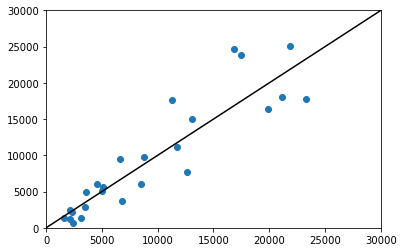

main_only_20_ada_RMSE_rfr_sel_data.png


In [133]:
with open("{0}_{1}_{2}_{3}_sel_model".format(var_, d_type, fac, mdl), 'rb') as f:
        rf = pickle.load(f)

        predicted = rf.predict(xdata2)

#print 'r2 =' ,  rf.score(predicted, y_2)
#print 'rmse =', np.sqrt(np.mean((y_2 - predicted)**2))
#print 'n =' , len(y_2)

print('Predicted data r2 =', rf.score(xdata2, ydata))
print('MSE =', format(np.mean((ydata - rf.predict(xdata2))** 2), '.3f'))
print('RMSE =', format(np.sqrt(np.mean((predicted - ydata) ** 2)), '.3f'))
print('explained_var =',format(explained_variance_score(ydata, predicted),  '.3f'))
print('bias =' , format(np.mean(ydata) - np.mean(predicted), '.3f'))
print('n =' , len(ydata))


# plot up predicted and observed data 
plt.scatter(predicted, ydata) #,s=8, c='b', marker='o')

# data for the 1 for 1 line
x = [-1,30000]
y = [-1,30000]

#sets the limits of the axis
plt.xlim(-1, 30000)
plt.ylim(-1, 30000)

# 1 for 1 line

fig = plt.figure(1)
plt.plot(x, y, color = 'black')
fig.savefig("{0}_{1}_{2}_{3}_sel_data.png".format(var_, d_type, fac, mdl),dpi=600)
plt.show()
print("{0}_{1}_{2}_{3}_sel_data.png".format(var_, d_type, fac, mdl))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# data to plot
x = predicted
y = ydata

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]


fig, ax = plt.subplots()
ax.scatter(x, y, c=z, s=0.5, edgecolor='')

# data for the 1 for 1 line
a = [-1,30]
b = [-1,30]

#sets the limits of the axis
plt.xlim(-1,30)
plt.ylim(-1,30)
plt.ylabel('Observed mean CHM')
plt.xlabel('Predicted mean CHM')
# 1 for 1 line
ax.plot(a, b, color = 'black')

plt.show()

In [ ]:
with open("{0}_{1}_{2}_{3}_sel_data".format(var_, d_type, fac, mdl)', 'rb') as f:
        rf = cPickle.load(f)

        predicted = rf.predict(xdata2)

#print 'r2 =' ,  rf.score(predicted, y_2)
#print 'rmse =', np.sqrt(np.mean((y_2 - predicted)**2))
#print 'n =' , len(y_2)

print 'Predicted data r2 =', rf.score(xdata2, ydata)
print 'MSE =', format(np.mean((ydata - rf.predict(xdata2))** 2), '.3f')
print 'RMSE =', format(np.sqrt(np.mean((predicted - ydata) ** 2)), '.3f')
print 'explained_var =',format(explained_variance_score(ydata, predicted),  '.3f') 
print 'bias =' , format(np.mean(ydata) - np.mean(predicted), '.3f')
print 'n =' , len(ydata)


# plot up predicted and observed data 
plt.scatter(predicted, ydata,s=0.002, c='b', marker='o')

# data for the 1 for 1 line
x = [-1,30]
y = [-1,30]

#sets the limits of the axis
plt.xlim(-1, 30)
plt.ylim(-1, 30)

# 1 for 1 line

fig = plt.figure(1)
plt.plot(x, y, color = 'black')
fig.savefig("{0}_{1}_{2}_{3}_sel_data.png".format(var_, d_type, fac, mdl),dpi=600)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# data to plot
x = predicted
y = ydata

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]


fig, ax = plt.subplots()
ax.scatter(x, y, c=z, s=0.5, edgecolor='')

# data for the 1 for 1 line
a = [-1,30]
b = [-1,30]

#sets the limits of the axis
plt.xlim(-1,30)
plt.ylim(-1,30)
plt.ylabel('Observed mean CHM')
plt.xlabel('Predicted mean CHM')
# 1 for 1 line
ax.plot(a, b, color = 'black')

plt.show()

In [ ]:
with open('rfr_modelNamel57', 'rb') as f:
        rf = cPickle.load(f)

        predicted = rf.predict(xdata2)

#print 'r2 =' ,  rf.score(predicted, y_2)
#print 'rmse =', np.sqrt(np.mean((y_2 - predicted)**2))
#print 'n =' , len(y_2)

print 'Predicted data r2 =', rf.score(xdata2, ydata)
print 'MSE =', format(np.mean((ydata - rf.predict(xdata2))** 2), '.3f')
print 'RMSE =', format(np.sqrt(np.mean((predicted - ydata) ** 2)), '.3f')
print 'explained_var =',format(explained_variance_score(ydata, predicted),  '.3f') 
print 'bias =' , format(np.mean(ydata) - np.mean(predicted), '.3f')
print 'n =' , len(ydata)


# plot up predicted and observed data 
plt.scatter(predicted, ydata,s=0.002, c='b', marker='o')

# data for the 1 for 1 line
x = [-1,30]
y = [-1,30]

#sets the limits of the axis
plt.xlim(-1, 30)
plt.ylim(-1, 30)

# 1 for 1 line

fig = plt.figure(1)
plt.plot(x, y, color = 'black')
fig.savefig('predicted_Observed_Validation.png',dpi=600)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# data to plot
x = predicted
y = ydata

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]


fig, ax = plt.subplots()
ax.scatter(x, y, c=z, s=0.5, edgecolor='')

# data for the 1 for 1 line
a = [-1,30]
b = [-1,30]

#sets the limits of the axis
plt.xlim(-1,30)
plt.ylim(-1,30)
plt.ylabel('Observed mean CHM')
plt.xlabel('Predicted mean CHM')
# 1 for 1 line
ax.plot(a, b, color = 'black')

plt.show()

In [ ]:
with open('rfr_modelNamel57', 'rb') as f:
        rf = cPickle.load(f)

        predicted = rf.predict(xdata2)

#print 'r2 =' ,  rf.score(predicted, y_2)
#print 'rmse =', np.sqrt(np.mean((y_2 - predicted)**2))
#print 'n =' , len(y_2)

print 'Predicted data r2 =', rf.score(xdata2, ydata)
print 'MSE =', format(np.mean((ydata - rf.predict(xdata2))** 2), '.3f')
print 'RMSE =', format(np.sqrt(np.mean((predicted - ydata) ** 2)), '.3f')
print 'explained_var =',format(explained_variance_score(ydata, predicted),  '.3f') 
print 'bias =' , format(np.mean(ydata) - np.mean(predicted), '.3f')
print 'n =' , len(ydata)


# plot up predicted and observed data 
plt.scatter(predicted, ydata,s=0.002, c='b', marker='o')

# data for the 1 for 1 line
x = [-1,30]
y = [-1,30]

#sets the limits of the axis
plt.xlim(-1, 30)
plt.ylim(-1, 30)

# 1 for 1 line

fig = plt.figure(1)
plt.plot(x, y, color = 'black')
fig.savefig('predicted_Observed_Validationgtr4m.png',dpi=600)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# data to plot
x = predicted
y = ydata

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]


fig, ax = plt.subplots()
ax.scatter(x, y, c=z, s=0.5, edgecolor='')

# data for the 1 for 1 line
a = [-1,30]
b = [-1,30]

#sets the limits of the axis
plt.xlim(-1,30)
plt.ylim(-1,30)
plt.ylabel('Observed mean CHM')
plt.xlabel('Predicted mean CHM')
# 1 for 1 line
ax.plot(a, b, color = 'black')

plt.show()

In [ ]:
with open('rfr_modelNamel78', 'rb') as f:
        rf = cPickle.load(f)

        predicted = rf.predict(xdata2)

#print 'r2 =' ,  rf.score(predicted, y_2)
#print 'rmse =', np.sqrt(np.mean((y_2 - predicted)**2))
#print 'n =' , len(y_2)

print 'Predicted data r2 =', rf.score(xdata2, ydata)
print 'MSE =', format(np.mean((ydata - rf.predict(xdata2))** 2), '.3f')
print 'RMSE =', format(np.sqrt(np.mean((predicted - ydata) ** 2)), '.3f')
print 'explained_var =',format(explained_variance_score(ydata, predicted),  '.3f') 
print 'bias =' , format(np.mean(ydata) - np.mean(predicted), '.3f')
print 'n =' , len(ydata)


# plot up predicted and observed data 
plt.scatter(predicted, ydata,s=0.002, c='b', marker='o')

# data for the 1 for 1 line
x = [-1,30]
y = [-1,30]

#sets the limits of the axis
plt.xlim(-1, 30)
plt.ylim(-1, 30)

# 1 for 1 line

fig = plt.figure(1)
plt.plot(x, y, color = 'black')
fig.savefig('predicted_Observed_Validation.png',dpi=600)
plt.show()